# Проект "Промышленность". Введение

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. 

**Нам предстоит построить модель, которая предскажет температуру стали.**

## Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат _**(англ. tribe, «масса»).**_

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов _**(англ. *slab*, «плита»).**_

## Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

### План работы

1. Исследовательская работа:
    - Изучить данные;
    - Провести графический анализ;
    - Если есть проблемы и аномалии в данных, то выписать какие-то идеи для их учёта/устранения/исправления выявленных в данных;
    - План работ по всему проекту (что мы считаем нужным сделать)
    - Вопросы по моделируемому процессу для бизнеса (к тимлиду)
2. Предобработка данных
    - Пропуски в данных по сыпучим продуктам и проволке можно заполнить нулями;
    - Объединить данные черезс помощью inner_join по ключу (номер партии) и провести исследование по нему;
    - Исследовать взаимную корреляцию признаков;
3. Построение модели 
    - Разделить на обучающую и тестовую выборку в соотношении `(0.75 и 0.25)`;
    - Масштабировать их (можно через Pipeline);
    - Обучить модель градиетными бустингами или другие семейства модели (не менее 2 разных моделей) через `GridSearchCV` (для повышения качеств обучения) или `RandomizedSearchCV` (для скорости обучения);
    - Добиться `MAE` не более `6.8`. В лучшем случае - `менее 6.0`;
    - Протестировать лучшую модель на тестовой выборке;
    - Сделать анализ важности признаков модели-победителя;
    - Сделать проверку модели на адекватность с помощью константной модели (можно через `DummyRegressor`).
4. Отчет
    - Сравненить решения и плана;
    - Описать трудностей проекта;
    - Выписать ключевые шаги решения;
    - Указать какие признаки, которые использовали для обучения и их обработка;
    - Напиасть полное описание модели (с гиперпараметрами, включая random_state, если используемся);
    - Написать итоговую метрику;
    - Оставить рекомендацию по улучшению решения.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Проект-&quot;Промышленность&quot;.-Введение" data-toc-modified-id="Проект-&quot;Промышленность&quot;.-Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Проект "Промышленность". Введение</a></span><ul class="toc-item"><li><span><a href="#Описание-этапа-обработки" data-toc-modified-id="Описание-этапа-обработки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание этапа обработки</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span><ul class="toc-item"><li><span><a href="#План-работы" data-toc-modified-id="План-работы-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>План работы</a></span></li><li><span><a href="#Подключение-библиотек" data-toc-modified-id="Подключение-библиотек-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Подключение библиотек</a></span></li></ul></li></ul></li><li><span><a href="#Исследовательская-работа" data-toc-modified-id="Исследовательская-работа-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательская работа</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Получение-датасетов-и-изучение-их" data-toc-modified-id="Получение-датасетов-и-изучение-их-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Получение датасетов и изучение их</a></span></li><li><span><a href="#Данные-об-электродах" data-toc-modified-id="Данные-об-электродах-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Данные об электродах</a></span></li><li><span><a href="#Данные-о-подаче-сыпучих-материалов-(объём)" data-toc-modified-id="Данные-о-подаче-сыпучих-материалов-(объём)-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Данные о подаче сыпучих материалов (объём)</a></span></li><li><span><a href="#Данные-о-подаче-сыпучих-материалов-(время)" data-toc-modified-id="Данные-о-подаче-сыпучих-материалов-(время)-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Данные о подаче сыпучих материалов (время)</a></span></li><li><span><a href="#Данные-о-продувке-сплава-газом" data-toc-modified-id="Данные-о-продувке-сплава-газом-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Данные о продувке сплава газом</a></span></li><li><span><a href="#Результаты-измерения-температуры" data-toc-modified-id="Результаты-измерения-температуры-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Результаты измерения температуры</a></span></li><li><span><a href="#Данные-о-проволочных-материалах-(объём)" data-toc-modified-id="Данные-о-проволочных-материалах-(объём)-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Данные о проволочных материалах (объём)</a></span></li><li><span><a href="#Данные-о-проволочных-материалах-(время)" data-toc-modified-id="Данные-о-проволочных-материалах-(время)-2.1.8"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>Данные о проволочных материалах (время)</a></span></li></ul></li><li><span><a href="#Промежуточный-вывод-по-изучением-данных-по-всему-датафрейму" data-toc-modified-id="Промежуточный-вывод-по-изучением-данных-по-всему-датафрейму-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Промежуточный вывод по изучением данных по всему датафрейму</a></span></li><li><span><a href="#Графики-данных" data-toc-modified-id="Графики-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Графики данных</a></span><ul class="toc-item"><li><span><a href="#Данные-об-электродах" data-toc-modified-id="Данные-об-электродах-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Данные об электродах</a></span><ul class="toc-item"><li><span><a href="#Активная-мощность" data-toc-modified-id="Активная-мощность-2.3.1.1"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>Активная мощность</a></span></li><li><span><a href="#Реактивная-мощность" data-toc-modified-id="Реактивная-мощность-2.3.1.2"><span class="toc-item-num">2.3.1.2&nbsp;&nbsp;</span>Реактивная мощность</a></span></li></ul></li><li><span><a href="#Данные-о-продувке-сплава-газом" data-toc-modified-id="Данные-о-продувке-сплава-газом-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Данные о продувке сплава газом</a></span></li></ul></li><li><span><a href="#Пропущенные-значения" data-toc-modified-id="Пропущенные-значения-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Пропущенные значения</a></span></li><li><span><a href="#Промежуточный-вывод-по-исследовательской-работе" data-toc-modified-id="Промежуточный-вывод-по-исследовательской-работе-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Промежуточный вывод по исследовательской работе</a></span></li><li><span><a href="#Вопросы-к-бизнесу-по-процессу" data-toc-modified-id="Вопросы-к-бизнесу-по-процессу-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Вопросы к бизнесу по процессу</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Преобразование-в-другой-тип-данных" data-toc-modified-id="Преобразование-в-другой-тип-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Преобразование в другой тип данных</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Удаление-&quot;супер-выбросов&quot;" data-toc-modified-id="Удаление-&quot;супер-выбросов&quot;-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Удаление "супер-выбросов"</a></span></li><li><span><a href="#Удаление-данных,-которые-противоречат-себя" data-toc-modified-id="Удаление-данных,-которые-противоречат-себя-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Удаление данных, которые противоречат себя</a></span><ul class="toc-item"><li><span><a href="#Удаление-данных,-в-которых-температура-плавления-стали-меньше-1500" data-toc-modified-id="Удаление-данных,-в-которых-температура-плавления-стали-меньше-1500-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Удаление данных, в которых температура плавления стали меньше 1500</a></span></li><li><span><a href="#Удаление-данных,-в-котором-содержатся-пропуски-температуры" data-toc-modified-id="Удаление-данных,-в-котором-содержатся-пропуски-температуры-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Удаление данных, в котором содержатся пропуски температуры</a></span></li><li><span><a href="#Процент-потери-данных" data-toc-modified-id="Процент-потери-данных-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Процент потери данных</a></span></li></ul></li><li><span><a href="#Заполнение-пропуски-нулями" data-toc-modified-id="Заполнение-пропуски-нулями-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Заполнение пропуски нулями</a></span></li><li><span><a href="#Объединение-данных" data-toc-modified-id="Объединение-данных-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Объединение данных</a></span><ul class="toc-item"><li><span><a href="#Создание-новой-таблицы---начальная-и-конечная-температура-плавления-стали-и-их-время" data-toc-modified-id="Создание-новой-таблицы---начальная-и-конечная-температура-плавления-стали-и-их-время-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Создание новой таблицы - начальная и конечная температура плавления стали и их время</a></span></li><li><span><a href="#Агрегирование-данных-по-электродам-для-каждого-ключа" data-toc-modified-id="Агрегирование-данных-по-электродам-для-каждого-ключа-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>Агрегирование данных по электродам для каждого ключа</a></span></li><li><span><a href="#Объединение-несколько-датафреймов" data-toc-modified-id="Объединение-несколько-датафреймов-3.6.3"><span class="toc-item-num">3.6.3&nbsp;&nbsp;</span>Объединение несколько датафреймов</a></span></li></ul></li><li><span><a href="#Корреляция-данных" data-toc-modified-id="Корреляция-данных-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Корреляция данных</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Машинное-обучение" data-toc-modified-id="Машинное-обучение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Машинное обучение</a></span><ul class="toc-item"><li><span><a href="#Деление-на-обучающей-и-валидационной-выборки" data-toc-modified-id="Деление-на-обучающей-и-валидационной-выборки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Деление на обучающей и валидационной выборки</a></span></li><li><span><a href="#Масштабируем-признаки" data-toc-modified-id="Масштабируем-признаки-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Масштабируем признаки</a></span></li><li><span><a href="#Построение-модели-и-обучение" data-toc-modified-id="Построение-модели-и-обучение-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Построение модели и обучение</a></span><ul class="toc-item"><li><span><a href="#Линейные-методы" data-toc-modified-id="Линейные-методы-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Линейные методы</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-4.3.1.1"><span class="toc-item-num">4.3.1.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-4.3.1.2"><span class="toc-item-num">4.3.1.2&nbsp;&nbsp;</span>Ridge Regression</a></span></li><li><span><a href="#ElasticNet" data-toc-modified-id="ElasticNet-4.3.1.3"><span class="toc-item-num">4.3.1.3&nbsp;&nbsp;</span>ElasticNet</a></span></li><li><span><a href="#Bayesian-Ridge-Regression" data-toc-modified-id="Bayesian-Ridge-Regression-4.3.1.4"><span class="toc-item-num">4.3.1.4&nbsp;&nbsp;</span>Bayesian Ridge Regression</a></span></li><li><span><a href="#RidgeCV" data-toc-modified-id="RidgeCV-4.3.1.5"><span class="toc-item-num">4.3.1.5&nbsp;&nbsp;</span>RidgeCV</a></span></li></ul></li><li><span><a href="#Методы-деревьев" data-toc-modified-id="Методы-деревьев-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Методы деревьев</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-4.3.2.1"><span class="toc-item-num">4.3.2.1&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-4.3.2.2"><span class="toc-item-num">4.3.2.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#ExtraTreesRegressor" data-toc-modified-id="ExtraTreesRegressor-4.3.2.3"><span class="toc-item-num">4.3.2.3&nbsp;&nbsp;</span>ExtraTreesRegressor</a></span></li></ul></li><li><span><a href="#Градиетные-бустинги" data-toc-modified-id="Градиетные-бустинги-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Градиетные бустинги</a></span><ul class="toc-item"><li><span><a href="#AdaBoostRegressor" data-toc-modified-id="AdaBoostRegressor-4.3.3.1"><span class="toc-item-num">4.3.3.1&nbsp;&nbsp;</span>AdaBoostRegressor</a></span></li><li><span><a href="#LightGBMRegressor" data-toc-modified-id="LightGBMRegressor-4.3.3.2"><span class="toc-item-num">4.3.3.2&nbsp;&nbsp;</span>LightGBMRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-4.3.3.3"><span class="toc-item-num">4.3.3.3&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#GradientBoostingRegressor" data-toc-modified-id="GradientBoostingRegressor-4.3.3.4"><span class="toc-item-num">4.3.3.4&nbsp;&nbsp;</span>GradientBoostingRegressor</a></span></li><li><span><a href="#XGBRegressor" data-toc-modified-id="XGBRegressor-4.3.3.5"><span class="toc-item-num">4.3.3.5&nbsp;&nbsp;</span>XGBRegressor</a></span></li></ul></li><li><span><a href="#Другие-методы" data-toc-modified-id="Другие-методы-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Другие методы</a></span><ul class="toc-item"><li><span><a href="#KNeighborsRegressor" data-toc-modified-id="KNeighborsRegressor-4.3.4.1"><span class="toc-item-num">4.3.4.1&nbsp;&nbsp;</span>KNeighborsRegressor</a></span></li><li><span><a href="#MLPRegressor" data-toc-modified-id="MLPRegressor-4.3.4.2"><span class="toc-item-num">4.3.4.2&nbsp;&nbsp;</span>MLPRegressor</a></span></li><li><span><a href="#GaussianProcessRegressor" data-toc-modified-id="GaussianProcessRegressor-4.3.4.3"><span class="toc-item-num">4.3.4.3&nbsp;&nbsp;</span>GaussianProcessRegressor</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Итоговая-таблица-после-обучения" data-toc-modified-id="Итоговая-таблица-после-обучения-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Итоговая таблица после обучения</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li><li><span><a href="#Анализ-важности-признаков-модели-победителя" data-toc-modified-id="Анализ-важности-признаков-модели-победителя-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Анализ важности признаков модели-победителя</a></span></li><li><span><a href="#Проверка-модель-на-адекватность" data-toc-modified-id="Проверка-модель-на-адекватность-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Проверка модель на адекватность</a></span></li></ul></li><li><span><a href="#Итог" data-toc-modified-id="Итог-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итог</a></span><ul class="toc-item"><li><span><a href="#Сравнение-решения-и-плана" data-toc-modified-id="Сравнение-решения-и-плана-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Сравнение решения и плана</a></span></li><li><span><a href="#Используемые-признаки-для-обучения-и-их-обработка" data-toc-modified-id="Используемые-признаки-для-обучения-и-их-обработка-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Используемые признаки для обучения и их обработка</a></span></li><li><span><a href="#Трудности-проекта" data-toc-modified-id="Трудности-проекта-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Трудности проекта</a></span></li><li><span><a href="#Полное-описание-модели" data-toc-modified-id="Полное-описание-модели-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Полное описание модели</a></span></li><li><span><a href="#Итоговая-метрика" data-toc-modified-id="Итоговая-метрика-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Итоговая метрика</a></span></li><li><span><a href="#Рекомендация-по-улучшению" data-toc-modified-id="Рекомендация-по-улучшению-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Рекомендация по улучшению</a></span></li></ul></li></ul></div>

### Подключение библиотек

In [1]:
# Уведомление о завершение работы определенного ячейка (очень пригодится для машинного обучения)
!pip install -q jupyternotify

# Добавил флаг -q, чтобы заблокировать лишние логи. Проект большой и лишний "мусор" нам не нужен.

import jupyternotify
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [1]:
# Подключаем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Для создания слабых связей 
import weakref

# Для вычисления
import math

# Для машинного обучения
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, BayesianRidge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
# К-ближайший сосед
from sklearn.neighbors import KNeighborsRegressor
# Многослойный перцептрон
from sklearn.neural_network import MLPRegressor
# Для обучения GaussianProcessRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Масштабируемость модели
from sklearn.preprocessing import StandardScaler

# MAE метрика
from sklearn.metrics import mean_absolute_error

# Градиетный бустинг
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Время обучения модели
import timeit

# Для константной модели
from sklearn.dummy import DummyRegressor

# Исследовательская работа

## Изучение данных

### Получение датасетов и изучение их

In [12]:
try:
    try: # С локального файла
        print('Ищем данные с локального диска.')
        # Данные об электродах
        data_arc_new = pd.read_csv('datasets/data_arc_new.csv')
        # Данные о подаче сыпучих материалов (объём)
        data_bulk_new = pd.read_csv('datasets/data_bulk_new.csv')
        # Данные о подаче сыпучих материалов (время)
        data_bulk_time_new = pd.read_csv('datasets/data_bulk_time_new.csv')
        # Данные о продувке сплава газом
        data_gas_new = pd.read_csv('datasets/data_gas_new.csv')
        # Результаты измерения температуры
        data_temp_new = pd.read_csv('datasets/data_temp_new.csv')
        # Данные о проволочных материалах (объём)
        data_wire_new = pd.read_csv('datasets/data_wire_new.csv')
        # Данные о проволочных материалах (время)
        data_wire_time_new = pd.read_csv('datasets/data_wire_time_new.csv')
        print('Получены данные с локального диска.')
    except: # С Яндекса сервера
        print('Отсутствуют датасеты с локального диска. Скачиваем данные с датасета Яндекса сервера.')
        # Данные об электродах
        data_arc_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_arc_new.csv')
        # Данные о подаче сыпучих материалов (объём)
        data_bulk_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_bulk_new.csv')
        # Данные о подаче сыпучих материалов (время)
        data_bulk_time_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_bulk_time_new.csv')
        # Данные о продувке сплава газом
        data_gas_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_gas_new.csv')
        # Результаты измерения температуры
        data_temp_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_temp_new.csv')
        # Данные о проволочных материалах (объём)
        data_wire_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_wire_new.csv')
        # Данные о проволочных материалах (время)
        data_wire_time_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_wire_time_new.csv')
        print('Загружены данные с датасета Яндекса сервера.')
except:
    print('Отсутствуют датасеты. Проверьте путь файла или содержимое датасетов.')

Ищем данные с локального диска.
Получены данные с локального диска


### Данные об электродах

##### Узнаем содержимое

In [6]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


В целях экомомии памяти можно преобразовать с вещественного типа float64 на float32. 

А тип данных object, в котором содержатся временные данные, можно преобразовать в другой тип данных - dataframe.

##### Чтение данных

In [7]:
data_arc_new.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


Вполне оптимальные данные

##### Описательная статистка

In [8]:
data_arc_new.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


In [9]:
data_arc_new[data_arc_new['Реактивная мощность'] == data_arc_new['Реактивная мощность'].min()]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924


Тут можно заметить, что присутствует реактивная мощность, значения которой составляет `-715.479924`. Это скорее всего аномальное значение нежели на технические особенности. Его нужно устранять в этапах предобработки данных

Снова рассмотрим описательную статистку без аномального значения

In [10]:
data_arc_new[data_arc_new['Реактивная мощность'] != data_arc_new['Реактивная мощность'].min()].describe()

,key,Активная мощность,Реактивная мощность
count,14875.000000,14875.000000,14875.000000
mean,1615.186756,0.662749,0.487115
std,934.593897,0.258894,0.197612
min,1.000000,0.223120,0.153777
25%,806.000000,0.467115,0.337190
50%,1617.000000,0.599578,0.441665
75%,2429.000000,0.830135,0.608223
max,3241.000000,1.463773,1.270284


Результат оказался вполне адекватным. 

##### Корреляция 

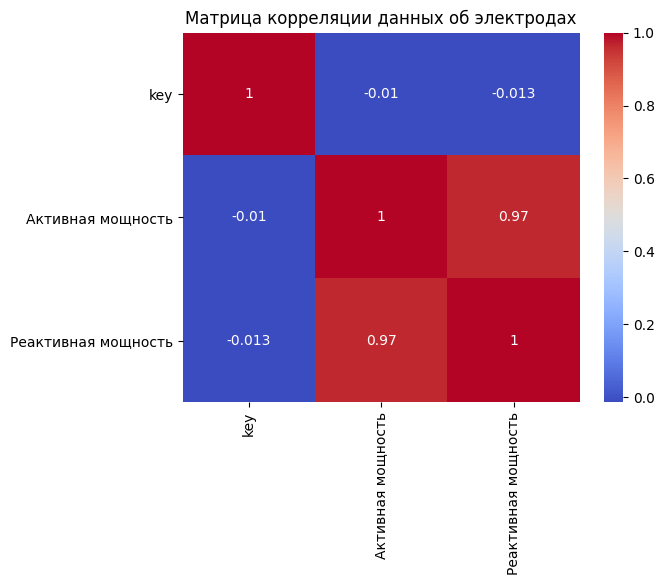

In [11]:
# Вычисление матрицы корреляции (без аномального значения)
corr_matrix = data_arc_new[data_arc_new['Реактивная мощность'] != data_arc_new['Реактивная мощность'].min()].corr()

# Построение тепловой карты корреляции
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm');

# Добавление заголовка
plt.title('Матрица корреляции данных об электродах');

Как и видим, что есть корреляция сильно положительная - `Реактивная мощность` и `Активная мощность`. Т.е. иными словами можно сказать, что с увеличением `Реактивной мощности` будет увеличивать вместе с `Активной мощности`.

Если не ошибаюсь, в идеально сбалансированной системе с правильной компенсацией реактивной мощности, активная и реактивная мощности являются независимыми друг от друга. Они имеют разные физические характеристики и выполняют разные функции в системе электропотребления.

##### Промежуточный вывод по данным об электродах

С типами данными все нормально получается, но можно оптимизировать их, например, преобразовать с вещественного типа `float64` на `float32` в целях экономии памяти. А тип данных `object`, в котором содержатся временные данные, можно преобразовать в другой тип данных - `dataframe`.

Также нельзя отрицать, что есть аномальное значение в реактивной мощности `-715.479924`, которого необходимо устранить.

Корреляция между `Реактивной мощности` и `Активной мощности` сильно положительная, что и вызывает вопрос к техническому специалисту, это и так должно ли быть или нет?

### Данные о подаче сыпучих материалов (объём)

##### Узнаем содержимое

In [12]:
data_bulk_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


Аналогично с предыдующим - в целях экомомии памяти можно преобразовать с вещественного типа `float64` на `float32`. 

##### Чтение данных

In [13]:
data_bulk_new.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


Вполне оптимальные данные, но присутствуют значительные кол-ва пропусков

##### Описательная статистка

In [14]:
data_bulk_new.describe()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


Можно заметить, что в `Bulk 12` выгрузили огромное кол-во объемов сыпучих руд, т.е. кол-во составляет `1849`. Аномальное ли это или нет? Рассмотрим далее. А остальные значения о многом не говорят, пока не построим график.

##### Корреляция 

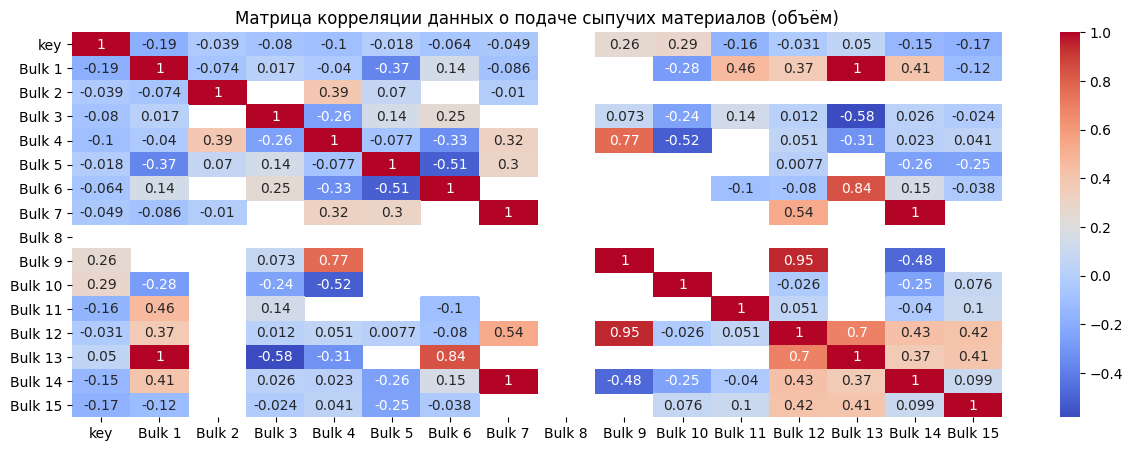

In [15]:
plt.figure(figsize=(15, 5))

# Вычисление матрицы корреляции
corr_matrix = data_bulk_new.corr()

# Построение тепловой карты корреляции
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm');

# Добавление заголовка
plt.title('Матрица корреляции данных о подаче сыпучих материалов (объём)');

plt.show()

Как и видно, что существуют белые (незакрашенные) квадратики, которые являются незаполненными значениями, т.е. `NaN`. Но нельзя не отметить, что есть корреляция сильно положительная - `Bulk 1` и `Bulk 13`, `Bulk 7` и `Bulk 14`, и еще другие, значения у которых составляют `0.7`, `0.84` и т.д. И существуют корреляция сильно отрицательная. 

Скорее всего чаще всего поступают с ковша `Bulk 1` на ковш `Bulk 13` и т.д. А у остальных более менее равномерно распределены, значит, что независимо от ситуации поставляют в другой ковш в случайным образом.

##### Промежуточный вывод по данным о подаче сыпучих материалов (объём)

Также в целях экомомии памяти можно преобразовать с вещественного типа `float64` на `float32`. 

И остается вопрос открытм по поводу аномального значения - в `Bulk 12` выгрузили огромное кол-во объемов сыпучих руд, т.е. кол-во составляет `1849`.

И существуют корреляция сильно положительная - `Bulk 1` и `Bulk 13`, `Bulk 7` и `Bulk 14`, и сильно отрицательная. 

### Данные о подаче сыпучих материалов (время)

##### Узнаем содержимое

In [16]:
data_bulk_time_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


Аналогично с предыдующим - в целях экомомии памяти можно преобразовать тип данных `object` в другой тип данных - `dataframe`.

##### Чтение данных

In [17]:
data_bulk_time_new.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


Вполне оптимальные данные, но опять же присутствуют значительные кол-ва пропусков

##### Описательная статистка

In [18]:
data_bulk_time_new.describe()

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


Пока ничего не можем сказать об этом. Ничего нет информативного. Тем более нет смысла построить корреляцию

##### Промежуточный вывод по данным о подаче сыпучих материалов (время)

По этому датафрейму не можем сказать многое, и здесь все как обычно:
- можно преобразовать тип данных `object` в другой тип данных - `dataframe` для экономии памяти
- присутствуют значительные кол-ва пропусков

### Данные о продувке сплава газом

##### Узнаем содержимое

In [19]:
data_gas_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


Аналогично с предыдующим - в целях экомомии памяти можно преобразовать с вещественного типа `float64` на `float32`. 

##### Чтение данных

In [20]:
data_gas_new.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


Вполне оптимальные данные

##### Описательная статистка

In [21]:
data_gas_new.describe()

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


Средне всего потребляют газом - `11 л` объем инертного газа. А самым малым кол-во составляет `0.008399 л`. Больше ничего особенного нет, не говоря уж о необходимости построить корреляцию, потому что можно сказать, что `Key` - это просто идентификатор, не признак. 

Возможна корреляция между признаком и объемом потребления газа/температурой/электроэнергией если ключи упорядочены по времени и признаки тоже имеют тенденцию меняться со врмеменем.

##### Промежуточный вывод по данным о продувке сплава газом

Аналогично с предыдущим датафреймом - не можем сказать многое, и здесь все как обычно:
- можно преобразовать с вещественного типа `float64` на `float32` для экономии памяти

### Результаты измерения температуры

##### Узнаем содержимое

In [22]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


Аналогично с предыдующим - в целях экомомии памяти можно преобразовать с вещественного типа `float64` на `float32`. C `object` на `datetime`.

##### Чтение данных

In [23]:
data_temp_new.head()

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


Вполне оптимальные данные

##### Описательная статистка

In [24]:
data_temp_new.describe()

,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


Средняя температура выплавки стали, которого мы можем чаще всего встречать - `1591` градусов по цельсии. 

А самой максимальной температурой составляет `1705` градусов по цельсии. 

Минимальной - `1191` градусов по цельсии. Очень странно будет, если их оставлять, потому что, по идее, температура плавления стали должно быть не менее `1500` градусов по цельсии, пусть минимальным порогом окажется `1400` градусов по цельсии.

Признаков мало, поэтому нет смысла построить корреляцию

##### Промежуточный вывод по данным о результатах измерения температуры

Аналогично с предыдущим датафреймом - не можем сказать многое, и здесь все как обычно:
- можно преобразовать с вещественного типа `float64` на `float32` и с `object` на `datetime` для экономии памяти

Но нельзя не отметить, что присутствуют значения, которого нельзя оставить без внимания - температуру выплавки стали.
Минимальная температура плавки стали - `1191` градусов по цельсии. Очень странно будет, если их оставлять. Пусть минимальным порогом окажется `1400` градусов по цельсии.

### Данные о проволочных материалах (объём)

##### Узнаем содержимое

In [25]:
data_wire_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


Аналогично с предыдующим - в целях экомомии памяти можно преобразовать с вещественного типа `float64` на `float32`.

##### Чтение данных

In [26]:
data_wire_new.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вполне оптимальные данные, но опять же присутствуют значительные кол-ва пропусков

##### Описательная статистка

In [27]:
data_wire_new.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


Аналогичная ситуация с данными о подаче сыпучих материалов (объём), мало ли можем сказать по этими значениями, пока не создадим график.

##### Корреляция 

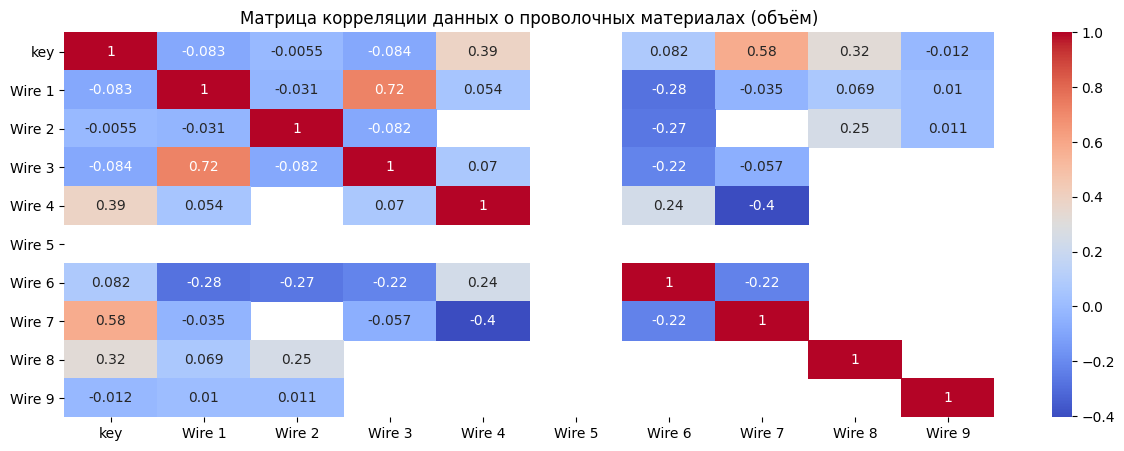

In [28]:
plt.figure(figsize=(15, 5))

# Вычисление матрицы корреляции
corr_matrix = data_wire_new.corr()

# Построение тепловой карты корреляции
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm');

# Добавление заголовка
plt.title('Матрица корреляции данных о проволочных материалах (объём)');

plt.show()

Здесь тоже можно заметить, что есть сильноположительная корреляция - `Wire 1` и `Wire 3` - `0,72` и сильноотрицательная - `Wire 4` и `Wire 7`- `-0,4`.

##### Промежуточный вывод по данным о проволочных материалах (объём)

Здесь можно преобразовать с вещественного типа `float64` на `float32` для экономии памяти.

Также у нас получилось оптимальные данные, но опять же присутствуют значительные кол-ва пропусков.

И присутствуют сильно положительная корреляция - `Wire 1` и `Wire 3` - `0,72` и сильно отрицательная - `Wire 4` и `Wire 7`- `-0,4`.

### Данные о проволочных материалах (время)

##### Узнаем содержимое

In [29]:
data_wire_time_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


Аналогично с предыдующим - в целях экомомии памяти можно преобразовать тип данных `object` в другой тип данных - `dataframe`.

##### Чтение данных

In [30]:
data_wire_time_new.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вполне оптимальные данные, но опять же присутствуют значительные кол-ва пропусков

##### Описательная статистка

In [31]:
data_wire_time_new.describe()

,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


Пока ничего не можем сказать об этом. Ничего нет информативного. Тем более нет смысла построить корреляцию

##### Промежуточный вывод по данным о проволочных материалах (время)

Здесь можно преобразовать тип данных `object` в другой тип данных - `dataframe` для экономии памяти.

Также у нас получилось оптимальные данные, но опять же присутствуют значительные кол-ва пропусков.

## Промежуточный вывод по изучением данных по всему датафрейму

**Для общих:**

Можно сэкономить памяти датафрейма - преобразовать в другой тип данных.

**Данные об электродах:**

Здесь заметно, что существует реактивная мощность, значения которой является отрицательным `-715.479924`. 
_*Это скорее всего выброс, нежели на технические особенности.*_. 

И был проведен отдельный статическое исследование без этого аномального значения. Что и привело к новому результату - существует корреляция сильно положительная.

Я не специалист по этой области, но интернет сообщил следующее: 
Отрицательное значение реактивной мощности указывает на то, что электрическая нагрузка в системе потребляет реактивную мощность вместо того, чтобы поставлять ее. 
Отрицательное значение реактивной мощности является нормальным и желательным явлением, если его вызывают специально установленные компенсирующие устройства.

Поэтому это остается открытым вопрос к тимлиду, учитывать это как аномальное значение или естетственное явление? Узнаем в ходе построения графиков.

**Данные о подаче сыпучих материалов (объём):**

Можно заметить, что в `Bulk 12` выгрузили огромное кол-во объемов сыпучих руд, т.е. кол-во составляет `1849`. Аномальное ли это или нет? Рассмотрим далее.

И существуют корреляция сильно положительная - `Bulk 1` и `Bulk 13`, `Bulk 7` и `Bulk 14`, и сильно отрицательная. 

А остальные значения о многом не говорят, пока не построим график.

**Данные о подаче сыпучих материалов (время):**

Помимо с огромными пропусками больше ничего не можем сказать об этом. Ничего нет информативного.

**Данные о продувке сплава газом:**

Средне всего потребляют газом - `11 л` объем инертного газа.  А самым малым кол-во составляет `0.008399 л`. Больше ничего нет информативного.

**Результаты измерения температуры:**

Средняя температура выплавки стали, которого мы можем чаще всего встречать - `1591` градусов по цельсии. А самой максимальной температурой составляет `1705` градусов по цельсии. Минимальной - `1191` градусов по цельсии.

**Данные о проволочных материалах (объём):**

Помимо с огромными пропусками больше ничего не можем сказать об этом. Аналогичная ситуация с данными о подаче сыпучих материалов (объём), мало ли можем сказать по этими значениями, пока не создадим график.

Также присутствуют сильно положительная корреляция - `Wire 1` и `Wire 3` - `0,72` и сильно отрицательная - `Wire 4` и `Wire 7`- `-0,4`.

**Данные о проволочных материалах (время):**

Аналогичная ситуация с данными о подаче сыпучих материалов (время). Помимо с огромными пропусками больше ничего не можем сказать об этом. Ничего нет информативного.

## Графики данных

### Данные об электродах

#### Активная мощность

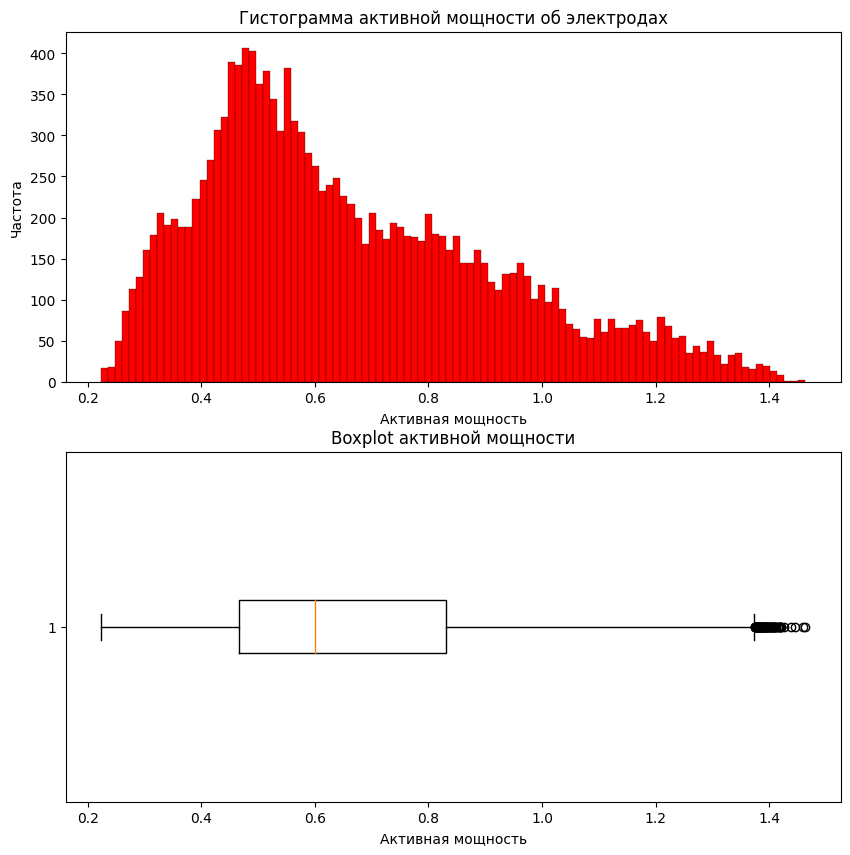

In [32]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[1].boxplot(data_arc_new['Активная мощность'], vert=False);
axs[1].set_title('Boxplot активной мощности');
axs[1].set_xlabel('Активная мощность');

axs[0].hist(data_arc_new['Активная мощность'], bins = 100, color = 'red', edgecolor='black', linewidth=0.2);
axs[0].set_title('Гистограмма активной мощности об электродах');
axs[0].set_ylabel('Частота');
axs[0].set_xlabel('Активная мощность');

Видны незначительные выбросы, но не критично. Можно их устранить

#### Реактивная мощность

Нам известно ранее, что в данных реактивной мощности есть аномальное значение, учтем без его и построим график

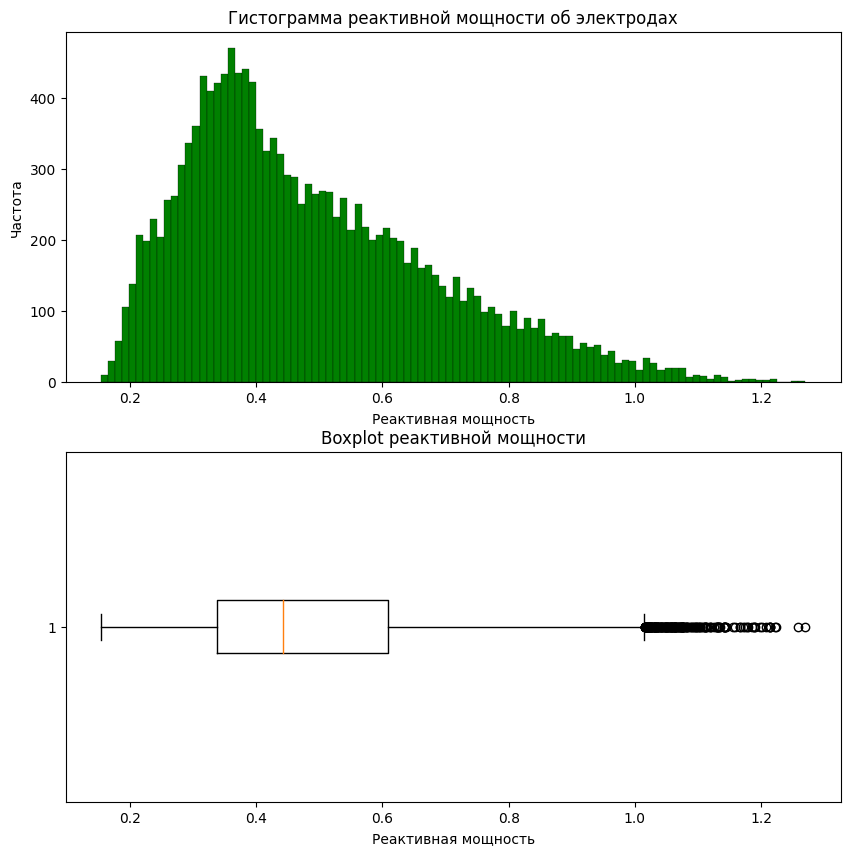

In [33]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[1].boxplot(data_arc_new[data_arc_new['Реактивная мощность'] != data_arc_new['Реактивная мощность'].min()]['Реактивная мощность'], vert=False);
axs[1].set_title('Boxplot реактивной мощности');
axs[1].set_xlabel('Реактивная мощность');

axs[0].hist(data_arc_new[data_arc_new['Реактивная мощность'] != data_arc_new['Реактивная мощность'].min()]['Реактивная мощность'], bins = 100, color = 'green', edgecolor='black', linewidth=0.2);
axs[0].set_title('Гистограмма реактивной мощности об электродах');
axs[0].set_ylabel('Частота');
axs[0].set_xlabel('Реактивная мощность');

По сравнению с предыдующим здесь видны больше выбросов, которых можно устранить

### Данные о продувке сплава газом

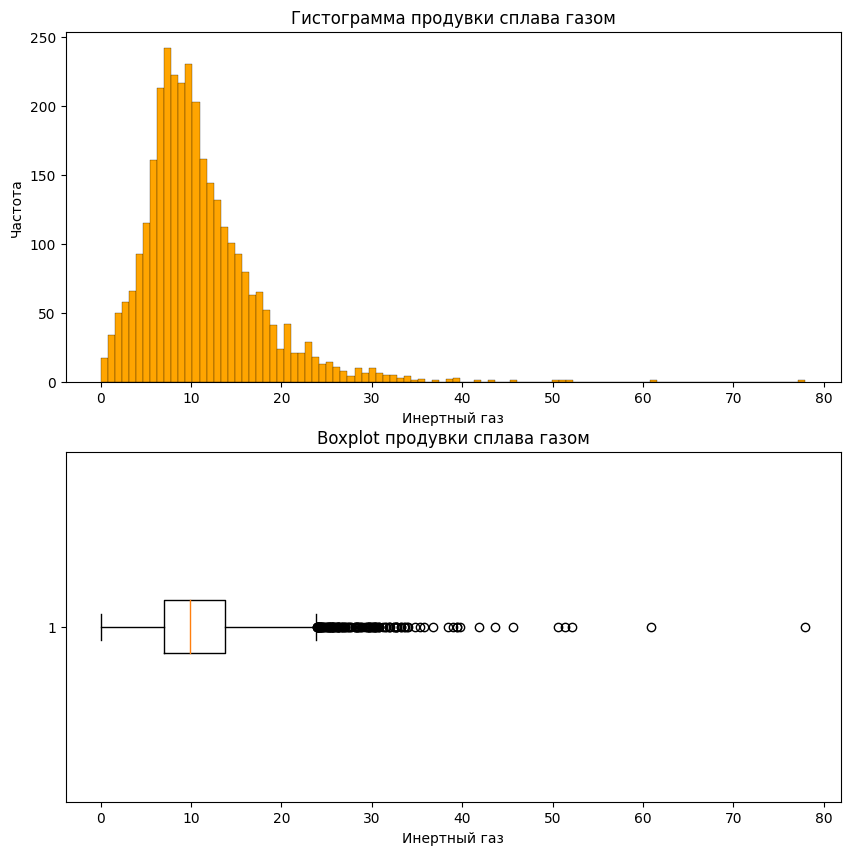

In [34]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[1].boxplot(data_gas_new['Газ 1'], vert=False);
axs[1].set_title('Boxplot продувки сплава газом');
axs[1].set_xlabel('Инертный газ');

axs[0].hist(data_gas_new['Газ 1'], bins = 100, color = 'orange', edgecolor='black', linewidth=0.2);
axs[0].set_title('Гистограмма продувки сплава газом');
axs[0].set_ylabel('Частота');
axs[0].set_xlabel('Инертный газ');

Также виден выбросы, но их довольно много по сравнению с электродами. Можно устранить их, но только в тех случая, когда значение инертного газа превышает 40

## Пропущенные значения

In [35]:
# Проверим на наличие пропущенных значений
def check_missed_columns(dataset):
    name_columns = dataset.columns
    print('Название колонки: \t Кол-во пропущенных значений:')
    for i in name_columns:
        if(dataset[i].isna().sum() > 0):
            print(f'{i} \t\t | \t\t {dataset[i].isna().sum()}')
            
        elif(i == name_columns[len(name_columns) - 1]):
            print('Отсутствует пропущенное значение')

In [36]:
full_data = [data_arc_new, 
             data_bulk_new, 
             data_bulk_time_new, 
             data_gas_new, 
             data_temp_new, 
             data_wire_new, 
             data_wire_time_new]

name_data = ['Данные об электродах', 
             'Данные о подаче сыпучих материалов (объём)', 
             'Данные о подаче сыпучих материалов (время)', 
             'Данные о продувке сплава газом', 
             'Результаты измерения температуры', 
             'Данные о проволочных материалах (объём)', 
             'Данные о проволочных материалах (время)']

In [37]:
print('='*100)
for i, data in enumerate(full_data):
    print(name_data[i])
    check_missed_columns(data)
    print('='*100)

Данные об электродах
Название колонки: 	 Кол-во пропущенных значений:
Отсутствует пропущенное значение
Данные о подаче сыпучих материалов (объём)
Название колонки: 	 Кол-во пропущенных значений:
Bulk 1 		 | 		 2877
Bulk 2 		 | 		 3107
Bulk 3 		 | 		 1831
Bulk 4 		 | 		 2115
Bulk 5 		 | 		 3052
Bulk 6 		 | 		 2553
Bulk 7 		 | 		 3104
Bulk 8 		 | 		 3128
Bulk 9 		 | 		 3110
Bulk 10 		 | 		 2953
Bulk 11 		 | 		 2952
Bulk 12 		 | 		 679
Bulk 13 		 | 		 3111
Bulk 14 		 | 		 323
Bulk 15 		 | 		 881
Данные о подаче сыпучих материалов (время)
Название колонки: 	 Кол-во пропущенных значений:
Bulk 1 		 | 		 2877
Bulk 2 		 | 		 3107
Bulk 3 		 | 		 1831
Bulk 4 		 | 		 2115
Bulk 5 		 | 		 3052
Bulk 6 		 | 		 2553
Bulk 7 		 | 		 3104
Bulk 8 		 | 		 3128
Bulk 9 		 | 		 3110
Bulk 10 		 | 		 2953
Bulk 11 		 | 		 2952
Bulk 12 		 | 		 679
Bulk 13 		 | 		 3111
Bulk 14 		 | 		 323
Bulk 15 		 | 		 881
Данные о продувке сплава газом
Название колонки: 	 Кол-во пропущенных значений:
Отсутствует пропущенное зна

Как и видим, что присутствуют много пропущенных значений. Сделать с ними будем - заполнить нулями

## Промежуточный вывод по исследовательской работе

Чтобы перейти к следующему пункту - моделирование данных для машинного обучения, необходимо сделать следующее:
1. Оптимизировать данные - преобразовать переменной на другой тип;
2. Устранить аномальные значения (выбросы), но не радикальным способом, т.е. содержимое датасет не должен терять более 30% данных от исходного данных. Следовательно, огромные выбросы удалить (удалить не только одну запись, но и данные по всей партии `key`);
3. С огромными пропусками будем заполнять нулями

## Вопросы к бизнесу по процессу

Отсутствуют вопросы к бизнесу по процессу

# Предобработка данных

##### Создадим копию оригинальные датафреймы на всякий

In [38]:
data_arc_new_copy = data_arc_new.copy()
data_bulk_new_copy = data_bulk_new.copy()
data_bulk_time_new_copy = data_bulk_time_new.copy()
data_gas_new_copy = data_gas_new.copy()
data_temp_new_copy = data_temp_new.copy()
data_wire_new_copy = data_wire_new.copy()
data_wire_time_new_copy = data_wire_time_new.copy()

In [39]:
full_data_copy = []

# Для создания слабых связей, чтобы при выполнении их тоже изменялось что то в списке full_data_copy
full_data_copy.append(weakref.proxy(data_arc_new_copy))
full_data_copy.append(weakref.proxy(data_bulk_new_copy))
full_data_copy.append(weakref.proxy(data_bulk_time_new_copy))
full_data_copy.append(weakref.proxy(data_gas_new_copy))
full_data_copy.append(weakref.proxy(data_temp_new_copy))
full_data_copy.append(weakref.proxy(data_wire_new_copy))
full_data_copy.append(weakref.proxy(data_wire_time_new_copy))

## Преобразование в другой тип данных

In [40]:
# Проверим объем занимаемой памяти в Мбайтах до преобразования
print('='*100)
for i, data in enumerate(full_data_copy):
    print(name_data[i])
    print(f'{data.memory_usage(deep=True).sum() / 1024 / 1024:.3f} Мбайт')  
    print('='*100)

Данные об электродах
2.497 Мбайт
Данные о подаче сыпучих материалов (объём)
0.382 Мбайт
Данные о подаче сыпучих материалов (время)
1.925 Мбайт
Данные о продувке сплава газом
0.050 Мбайт
Результаты измерения температуры
1.587 Мбайт
Данные о проволочных материалах (объём)
0.235 Мбайт
Данные о проволочных материалах (время)
1.052 Мбайт


In [41]:
# Автоматизируем
def change_type_variable(dateframe, show_print_report=False):
    for name_column in dateframe:
        if(dateframe[name_column].dtype  == 'int64'):
            dateframe[name_column] = dateframe[name_column].astype('int32')
            if(show_print_report):
                print(f'Успешно, преобразовали в другой тип INT32 колонки: {name_column}')
        if(dateframe[name_column].dtype  == 'float64'):
            dateframe[name_column] = dateframe[name_column].astype('float32')
            if(show_print_report):
                print(f'Успешно, преобразовали в другой тип FLOAT32 колонки: {name_column}')
        if(dateframe[name_column].dtype  == 'O'):
            # errors='coerce' позволяет заполнить пропущенное значение как 'NaT', а не '1970-01-01'
            dateframe[name_column] = pd.to_datetime(dateframe[name_column], errors='coerce')
            if(show_print_report):
                print(f'Успешно, преобразовали в другой тип DATETIME колонки: {name_column}')
        
    if not(show_print_report):
        print('Успешно, преобразованы в другой тип')

In [42]:
# Снова проверим на наличие пропущенное значение и убедимся
print('='*100)
for i, data in enumerate(full_data_copy):
    print(name_data[i])
    change_type_variable(data)
    print('='*100)

Данные об электродах
Успешно, преобразованы в другой тип
Данные о подаче сыпучих материалов (объём)
Успешно, преобразованы в другой тип
Данные о подаче сыпучих материалов (время)
Успешно, преобразованы в другой тип
Данные о продувке сплава газом
Успешно, преобразованы в другой тип
Результаты измерения температуры
Успешно, преобразованы в другой тип
Данные о проволочных материалах (объём)
Успешно, преобразованы в другой тип
Данные о проволочных материалах (время)
Успешно, преобразованы в другой тип


##### Проверим

In [43]:
# Снова проверим на типы переменной
print('='*100)
for i, data in enumerate(full_data_copy):
    print(name_data[i])
    display(data.info())
    print('='*100)

Данные об электродах
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int32         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float32       
 4   Реактивная мощность   14876 non-null  float32       
dtypes: datetime64[ns](2), float32(2), int32(1)
memory usage: 406.9 KB


None

Данные о подаче сыпучих материалов (объём)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int32  
 1   Bulk 1   252 non-null    float32
 2   Bulk 2   22 non-null     float32
 3   Bulk 3   1298 non-null   float32
 4   Bulk 4   1014 non-null   float32
 5   Bulk 5   77 non-null     float32
 6   Bulk 6   576 non-null    float32
 7   Bulk 7   25 non-null     float32
 8   Bulk 8   1 non-null      float32
 9   Bulk 9   19 non-null     float32
 10  Bulk 10  176 non-null    float32
 11  Bulk 11  177 non-null    float32
 12  Bulk 12  2450 non-null   float32
 13  Bulk 13  18 non-null     float32
 14  Bulk 14  2806 non-null   float32
 15  Bulk 15  2248 non-null   float32
dtypes: float32(15), int32(1)
memory usage: 195.7 KB


None

Данные о подаче сыпучих материалов (время)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int32         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int32(1)
mem

None

Данные о продувке сплава газом
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int32  
 1   Газ 1   3239 non-null   float32
dtypes: float32(1), int32(1)
memory usage: 25.4 KB


None

Результаты измерения температуры
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           18092 non-null  int32         
 1   Время замера  18092 non-null  datetime64[ns]
 2   Температура   14665 non-null  float32       
dtypes: datetime64[ns](1), float32(1), int32(1)
memory usage: 282.8 KB


None

Данные о проволочных материалах (объём)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int32  
 1   Wire 1  3055 non-null   float32
 2   Wire 2  1079 non-null   float32
 3   Wire 3  63 non-null     float32
 4   Wire 4  14 non-null     float32
 5   Wire 5  1 non-null      float32
 6   Wire 6  73 non-null     float32
 7   Wire 7  11 non-null     float32
 8   Wire 8  19 non-null     float32
 9   Wire 9  29 non-null     float32
dtypes: float32(9), int32(1)
memory usage: 120.5 KB


None

Данные о проволочных материалах (время)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int32         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int32(1)
memory usage: 228.8 KB


None

In [44]:
# Снова проверим на типы переменной
print('='*100)
for i, data in enumerate(full_data_copy):
    print(name_data[i])
    display(data.head(2))
    print('='*100)

Данные об электродах


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438


Данные о подаче сыпучих материалов (объём)


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0


Данные о подаче сыпучих материалов (время)


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39


Данные о продувке сплава газом


,key,Газ 1
0,1,29.749987
1,2,12.555561


Результаты измерения температуры


,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0


Данные о проволочных материалах (объём)


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Данные о проволочных материалах (время)


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [45]:
# Проверим объем занимаемой памяти в Мбайтах до преобразования
print('='*100)
for i, data in enumerate(full_data_copy):
    print(name_data[i])
    print(f'{data.memory_usage(deep=True).sum() / 1024 / 1024:.3f} Мбайт')  
    print('='*100)

Данные об электродах
0.397 Мбайт
Данные о подаче сыпучих материалов (объём)
0.191 Мбайт
Данные о подаче сыпучих материалов (время)
0.370 Мбайт
Данные о продувке сплава газом
0.025 Мбайт
Результаты измерения температуры
0.276 Мбайт
Данные о проволочных материалах (объём)
0.118 Мбайт
Данные о проволочных материалах (время)
0.223 Мбайт


In [46]:
# Узнаем, сколько сэкономили памяти
print('='*100)
for i in range(len(full_data)):
    print(name_data[i])
    original_memory = full_data[i].memory_usage(deep=True).sum()
    optimized_memory = full_data_copy[i].memory_usage(deep=True).sum()

    savings_percentage = (original_memory - optimized_memory) / original_memory * 100
    print(f"Сэкономлено {savings_percentage:.2f}% памяти")
    print('='*100)

Данные об электродах
Сэкономлено 84.09% памяти
Данные о подаче сыпучих материалов (объём)
Сэкономлено 49.98% памяти
Данные о подаче сыпучих материалов (время)
Сэкономлено 80.77% памяти
Данные о продувке сплава газом
Сэкономлено 49.88% памяти
Результаты измерения температуры
Сэкономлено 82.60% памяти
Данные о проволочных материалах (объём)
Сэкономлено 49.97% памяти
Данные о проволочных материалах (время)
Сэкономлено 78.76% памяти


Отлично, очень много мест сэкономили памяти. Особенно важно для работ с большими данными и для ускорения запросов и обучения. Однако при экономии памяти может вызывать потери точности данных, но здесь говорит о обратном, значит все нормально

## Дубликаты

In [47]:
print('='*100)
for i, data in enumerate(full_data_copy):
    print(name_data[i])
    print(f'Кол-во дубликатов: {data.duplicated().sum()}')
    print('='*100)

Данные об электродах
Кол-во дубликатов: 0
Данные о подаче сыпучих материалов (объём)
Кол-во дубликатов: 0
Данные о подаче сыпучих материалов (время)
Кол-во дубликатов: 0
Данные о продувке сплава газом
Кол-во дубликатов: 0
Результаты измерения температуры
Кол-во дубликатов: 0
Данные о проволочных материалах (объём)
Кол-во дубликатов: 0
Данные о проволочных материалах (время)
Кол-во дубликатов: 0


Отлично, нет дублирующих значений

## Удаление "супер-выбросов"

In [48]:
full_data_copy[0][full_data_copy[0]['Реактивная мощность'] == full_data_copy[0]['Реактивная мощность'].min()]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479919


##### Ранее мы обнаружили, что есть супер-выброс в реактивной мощности, теперь устраняем его с его номерами партии `key`

In [49]:
full_data_copy[0][full_data_copy[0]['Реактивная мощность'] == full_data_copy[0]['Реактивная мощность'].min()]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479919


##### Рассмотрим, существует ли другие связанные партии по аномальному значению? 

In [50]:
key_anomaly = full_data_copy[0][full_data_copy[0]['Реактивная мощность'] == full_data_copy[0]['Реактивная мощность'].min()]['key'].to_list()

print('Номер партии с аномальным значением:', key_anomaly)
print('Кол-во партий:', len(full_data_copy[0][full_data_copy[0]['key'] == key_anomaly[0]]))

Номер партии с аномальным значением: [2116]
Кол-во партий: 4


In [51]:
full_data_copy[0][full_data_copy[0]['key'] == key_anomaly[0]]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9778,2116,2019-07-28 02:07:12,2019-07-28 02:09:14,0.787549,0.693881
9779,2116,2019-07-28 02:13:10,2019-07-28 02:15:25,0.580263,0.411498
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479919
9781,2116,2019-07-28 02:29:11,2019-07-28 02:30:18,0.563641,0.408513


Однако, поимио этого датафрейма есть другие датафреймы, номер партии которого существует `2116`, и необходимо удалить её. 

Теперь удалим данные все партии по ключу 

In [52]:
full_data_copy[0] = full_data_copy[0][~full_data_copy[0]['key'].isin(key_anomaly)]

##### Проверим

In [53]:
full_data_copy[0][full_data_copy[0]['key'] == key_anomaly[0]]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность


Устранили их, переходим дальше

## Удаление данных, которые противоречат себя 

### Удаление данных, в которых температура плавления стали меньше 1500

##### Помимо отрицательной мощности можно заметить, что температура плавления стали 1450-1520, поэтому температура в ковше 1200 – это явная ошибка

###### Функция, которая удаляет данные датафреймов по указанному температуры и ниже ее. 

###### Однако при удалении выбранной температуры функция должна учитывать, что помимо этой выбранной температуры еще должна удалить другие датафреймы по этой партии

In [54]:
# А теперь смотрим, сколько данных, в которых температура меньше 1500 (т.е. не должны учитывать пропущенные значения)
TEMPERATURE_THRESHOLD = 1500

# Теперь пробуем без 0, и посмотрим
full_data_copy[4][full_data_copy[4]['Температура'] < TEMPERATURE_THRESHOLD]

,key,Время замера,Температура
4883,867,2019-06-06 08:03:39,1191.0
6784,1214,2019-06-18 08:01:03,1208.0
9050,1619,2019-07-03 02:34:41,1218.0
11495,2052,2019-07-25 08:49:15,1227.0
14283,2561,2019-08-12 18:49:29,1204.0


In [55]:
print('Размер данных: ', full_data_copy[4][full_data_copy[4]['Температура'] < TEMPERATURE_THRESHOLD].shape)

Размер данных:  (5, 3)


Данных достаточно немного, но все равно будет много, если учитывать номер партии по другим датафреймам

In [56]:
key_anomaly = full_data_copy[4][full_data_copy[4]['Температура'] < 1500]['key'].to_list()
print('Номер партии:', key_anomaly)

Номер партии: [867, 1214, 1619, 2052, 2561]


##### Удаление данные все партии по ключу в этом датафрейме

In [57]:
print('Кол-во партий в data_temp_new, которых будем удалять:', len(full_data_copy[4][full_data_copy[4]['key'].isin(key_anomaly)]))

Кол-во партий в data_temp_new, которых будем удалять: 27


In [58]:
full_data_copy[4] = full_data_copy[4][~full_data_copy[4]['key'].isin(key_anomaly)]

##### Проверим

In [59]:
key_anomaly = full_data_copy[4][full_data_copy[4]['Температура'] < 1500]['key'].to_list()
print('Номер партии:', key_anomaly)

Номер партии: []


Отлично, устранили, переходим дальше

### Удаление данных, в котором содержатся пропуски температуры

In [60]:
# Проверим на наличие пропусков в колонки температуры
if not(full_data_copy[4][full_data_copy[4]['Температура'].isnull()].empty):
    print('Присутствуют пропуски')
    print('Кол-во строк с пропусками:', len(full_data_copy[4][full_data_copy[4]['Температура'].isnull() == True]['key'].value_counts().index.to_list()))
    
    key_isnull_temperature = full_data_copy[4][full_data_copy[4]['Температура'].isnull()]['key'].to_list()
    print('Кол-во партий, в которой не заполнены температуры:', len(key_isnull_temperature))    
else:
    print('Отсутствуют пропуски')

Присутствуют пропуски
Кол-во строк с пропусками: 738
Кол-во партий, в которой не заполнены температуры: 3422


In [61]:
full_data_copy[4] = full_data_copy[4][~full_data_copy[4]['key'].isin(key_isnull_temperature)]

##### Проверка

In [62]:
# Проверим на наличие пропусков в колонки температуры
if not(full_data_copy[4][full_data_copy[4]['Температура'].isnull()].empty):
    print('Присутствуют пропуски')
    print('Кол-во строк с пропусками:', len(full_data_copy[4][full_data_copy[4]['Температура'].isnull() == True]['key'].value_counts().index.to_list()))
    
    key_isnull_temperature = full_data_copy[4][full_data_copy[4]['Температура'].isnull()]['key'].to_list()
    print('Кол-во партий, в которой не заполнены температуры:', len(key_isnull_temperature))    
else:
    print('Отсутствуют пропуски')

Отсутствуют пропуски


Устранили их, переходим дальше

### Процент потери данных

Рассмотрим, сколько потеряно данных, по идее, не должно быть больше 30%

In [63]:
print('='*100)
for i in range(len(full_data)):
    print(name_data[i])
    print(f'Потеряно {100 * (1 - full_data_copy[i].shape[0] / full_data[i].shape[0]):.3f}%')
    print('='*100)

Данные об электродах
Потеряно 0.027%
Данные о подаче сыпучих материалов (объём)
Потеряно 0.000%
Данные о подаче сыпучих материалов (время)
Потеряно 0.000%
Данные о продувке сплава газом
Потеряно 0.000%
Результаты измерения температуры
Потеряно 23.143%
Данные о проволочных материалах (объём)
Потеряно 0.000%
Данные о проволочных материалах (время)
Потеряно 0.000%


Не так уж большие потери. Касаются только датафреймы электроды и температуры, можно перейти дальше

## Заполнение пропуски нулями

In [64]:
# Функция, которая по датафреймам пробежит и проверяет на наличие пропущенных значений и заполняет нулями
def fill_zero_missed_columns(dataset, show_print_report=False):
    for name in dataset.columns:
        if(dataset[name].isna().sum() > 0 and dataset[name].dtype != '<M8[ns]'):
            if(show_print_report):
                print(f'ЗАПОЛНЕНЫ пропуски в датафрейме: "{name}" ')
            dataset[name] = dataset[name].fillna(0)
        else:
            if(show_print_report):
                print(f'В датафрейме: "{name}" ОТСУТСТВУЮТ пропуски')
    if not(show_print_report):
        print('Успешно')

In [65]:
print('='*100)
for i, data in enumerate(full_data_copy):
    print(name_data[i])
    fill_zero_missed_columns(data, True)
    print('='*100)

Данные об электродах
В датафрейме: "key" ОТСУТСТВУЮТ пропуски
В датафрейме: "Начало нагрева дугой" ОТСУТСТВУЮТ пропуски
В датафрейме: "Конец нагрева дугой" ОТСУТСТВУЮТ пропуски
В датафрейме: "Активная мощность" ОТСУТСТВУЮТ пропуски
В датафрейме: "Реактивная мощность" ОТСУТСТВУЮТ пропуски
Данные о подаче сыпучих материалов (объём)
В датафрейме: "key" ОТСУТСТВУЮТ пропуски
ЗАПОЛНЕНЫ пропуски в датафрейме: "Bulk 1" 
ЗАПОЛНЕНЫ пропуски в датафрейме: "Bulk 2" 
ЗАПОЛНЕНЫ пропуски в датафрейме: "Bulk 3" 
ЗАПОЛНЕНЫ пропуски в датафрейме: "Bulk 4" 
ЗАПОЛНЕНЫ пропуски в датафрейме: "Bulk 5" 
ЗАПОЛНЕНЫ пропуски в датафрейме: "Bulk 6" 
ЗАПОЛНЕНЫ пропуски в датафрейме: "Bulk 7" 
ЗАПОЛНЕНЫ пропуски в датафрейме: "Bulk 8" 
ЗАПОЛНЕНЫ пропуски в датафрейме: "Bulk 9" 
ЗАПОЛНЕНЫ пропуски в датафрейме: "Bulk 10" 
ЗАПОЛНЕНЫ пропуски в датафрейме: "Bulk 11" 
ЗАПОЛНЕНЫ пропуски в датафрейме: "Bulk 12" 
ЗАПОЛНЕНЫ пропуски в датафрейме: "Bulk 13" 
ЗАПОЛНЕНЫ пропуски в датафрейме: "Bulk 14" 
ЗАПОЛНЕНЫ пропуски в

In [66]:
# Снова проверим на наличие пропущенное значение и убедимся
print('='*100)
for i, data in enumerate(full_data_copy):
    print(name_data[i])
    check_missed_columns(data)
    print('='*100)

Данные об электродах
Название колонки: 	 Кол-во пропущенных значений:
Отсутствует пропущенное значение
Данные о подаче сыпучих материалов (объём)
Название колонки: 	 Кол-во пропущенных значений:
Отсутствует пропущенное значение
Данные о подаче сыпучих материалов (время)
Название колонки: 	 Кол-во пропущенных значений:
Bulk 1 		 | 		 2877
Bulk 2 		 | 		 3107
Bulk 3 		 | 		 1831
Bulk 4 		 | 		 2115
Bulk 5 		 | 		 3052
Bulk 6 		 | 		 2553
Bulk 7 		 | 		 3104
Bulk 8 		 | 		 3128
Bulk 9 		 | 		 3110
Bulk 10 		 | 		 2953
Bulk 11 		 | 		 2952
Bulk 12 		 | 		 679
Bulk 13 		 | 		 3111
Bulk 14 		 | 		 323
Bulk 15 		 | 		 881
Данные о продувке сплава газом
Название колонки: 	 Кол-во пропущенных значений:
Отсутствует пропущенное значение
Результаты измерения температуры
Название колонки: 	 Кол-во пропущенных значений:
Отсутствует пропущенное значение
Данные о проволочных материалах (объём)
Название колонки: 	 Кол-во пропущенных значений:
Отсутствует пропущенное значение
Данные о проволочных матери

Отлично, нет пропущенных значений, кроме время для `Bulk` и `Wire`, теперь рассмотрим на дубликаты

In [67]:
# Снова проверим на заполнение переменной
print('='*100)
for i, data in enumerate(full_data_copy):
    print(name_data[i])
    display(data.head(2))
    print('='*100)

Данные об электродах


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438


Данные о подаче сыпучих материалов (объём)


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0


Данные о подаче сыпучих материалов (время)


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39


Данные о продувке сплава газом


,key,Газ 1
0,1,29.749987
1,2,12.555561


Результаты измерения температуры


,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0


Данные о проволочных материалах (объём)


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Данные о проволочных материалах (время)


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


##### Небольшое предисловие после выполнения вышеперечисленной работы

Теперь что мы имеем, преобразовали в другой тип данных, сэкономили памяти, производительность должна быть больше. А также заполнили пропуски в датафрейме, колонки у которого является вещественным типом `float32`, а с `datetime` оставили пропущенным значением, т.к. нежелательно было бы заполнять другими значениями. По поводу дубликатов нет проблем. Удалили "супер-выбросов", все нормально. И теперь можно перейти к следующему пункту - объединение данных и рассмотреть корреляцию

## Объединение данных

##### Нам необходимо объединить 5 датафреймов:

- data_temp - Результаты измерения температуры (В котором содержатся: начальное, конечное время замера и начальная, конечная температура плавления стали (4 колонки))

- data_arc - Данные об электродах (В котором содержатся агрегирование данных по электродам для каждого ключа, т.е. необходимо  для каждого ключа рассчитать сумму/среднее или иную статистику. Можно вначале рассчитать энергию по каждому включению электрода, затем вычислить сумму по каждому ключу. Затем мощность умножить на время, чтобы получить энергию)

- data_bulk - Данные о подаче сыпучих материалов (объём)

- data_wire - Данные о проволочных материалах (объём)

- data_gas - Данные о продувке сплава газом

###### Результаты измерения температуры

In [68]:
full_data_copy[4].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13905 entries, 0 to 13925
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           13905 non-null  int32         
 1   Время замера  13905 non-null  datetime64[ns]
 2   Температура   13905 non-null  float32       
dtypes: datetime64[ns](1), float32(1), int32(1)
memory usage: 325.9 KB


In [69]:
full_data_copy[4].head()

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


###### Данные об электродах

In [70]:
full_data_copy[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14872 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14872 non-null  int32         
 1   Начало нагрева дугой  14872 non-null  datetime64[ns]
 2   Конец нагрева дугой   14872 non-null  datetime64[ns]
 3   Активная мощность     14872 non-null  float32       
 4   Реактивная мощность   14872 non-null  float32       
dtypes: datetime64[ns](2), float32(2), int32(1)
memory usage: 522.8 KB


In [71]:
full_data_copy[0].head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


###### Данные о подаче сыпучих материалов (объём)

In [72]:
full_data_copy[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int32  
 1   Bulk 1   3129 non-null   float32
 2   Bulk 2   3129 non-null   float32
 3   Bulk 3   3129 non-null   float32
 4   Bulk 4   3129 non-null   float32
 5   Bulk 5   3129 non-null   float32
 6   Bulk 6   3129 non-null   float32
 7   Bulk 7   3129 non-null   float32
 8   Bulk 8   3129 non-null   float32
 9   Bulk 9   3129 non-null   float32
 10  Bulk 10  3129 non-null   float32
 11  Bulk 11  3129 non-null   float32
 12  Bulk 12  3129 non-null   float32
 13  Bulk 13  3129 non-null   float32
 14  Bulk 14  3129 non-null   float32
 15  Bulk 15  3129 non-null   float32
dtypes: float32(15), int32(1)
memory usage: 195.7 KB


In [73]:
full_data_copy[1].head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0


###### Данные о проволочных материалах (объём)

In [74]:
full_data_copy[5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int32  
 1   Wire 1  3081 non-null   float32
 2   Wire 2  3081 non-null   float32
 3   Wire 3  3081 non-null   float32
 4   Wire 4  3081 non-null   float32
 5   Wire 5  3081 non-null   float32
 6   Wire 6  3081 non-null   float32
 7   Wire 7  3081 non-null   float32
 8   Wire 8  3081 non-null   float32
 9   Wire 9  3081 non-null   float32
dtypes: float32(9), int32(1)
memory usage: 120.5 KB


In [75]:
full_data_copy[5].head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160156,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238235,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Данные о продувке сплава газом

In [76]:
full_data_copy[3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int32  
 1   Газ 1   3239 non-null   float32
dtypes: float32(1), int32(1)
memory usage: 25.4 KB


In [77]:
full_data_copy[3].head()

,key,Газ 1
0,1,29.749987
1,2,12.555561
2,3,28.554792
3,4,18.841219
4,5,5.413692


### Создание новой таблицы - начальная и конечная температура плавления стали и их время

###### Перед тем как объединить нужно добавить две признаки: начальную и конечную температуру. Потому что по условии задачи нам необходимо предсказать конечную температуру стали

In [78]:
full_data_copy[4][full_data_copy[4]['key'] == 1]

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
5,1,2019-05-03 11:30:38,1613.0


Время начала замера составляет `2019-05-03 11:02:04`, а конечным замером - `2019-05-03 11:30:38`. 

Начальная температура - `1571.0`, конечной температурой - `1613.0`

In [79]:
# Группируем и с помощью функции подберем начальную и конечную
data_temp_measuring = full_data_copy[4].groupby(by='key', as_index = False).agg(['first', 'last'])

In [80]:
# Переимениуем названия колонки
data_temp_measuring.columns = ['Начало замера', 'Конец замера', 'Начальная температура', 'Конечная температура']

In [81]:
# Итоговая таблица
display(data_temp_measuring.head(3))

display(data_temp_measuring.tail(3))

,Начало замера,Конец замера,Начальная температура,Конечная температура
key,,,,
1,2019-05-03 11:02:04,2019-05-03 11:30:38,1571.0,1613.0
2,2019-05-03 11:34:04,2019-05-03 11:55:09,1581.0,1602.0
3,2019-05-03 12:06:44,2019-05-03 12:35:57,1596.0,1599.0


,Начало замера,Конец замера,Начальная температура,Конечная температура
key,,,,
2497,2019-08-10 12:37:26,2019-08-10 12:53:28,1571.0,1589.0
2498,2019-08-10 12:58:11,2019-08-10 13:23:31,1591.0,1594.0
2499,2019-08-10 13:33:21,2019-08-10 13:58:58,1569.0,1603.0


Однако, нельзя не заметить, что в данных по температуре могли остаться партии, где есть только один замер температуры. Исключать партии по критерию "первая температура равна последеней" нельзя, потому что существует партии с большим чем 1 замером температуры, у которых температура первого и последнего замера совпадают. Здесь можно убедиться

In [82]:
data_temp_measuring[data_temp_measuring['Начальная температура'] == data_temp_measuring['Конечная температура']].head()

,Начало замера,Конец замера,Начальная температура,Конечная температура
key,,,,
63,2019-05-05 22:04:48,2019-05-05 22:36:23,1580.0,1580.0
195,2019-05-11 00:01:36,2019-05-11 00:01:36,1583.0,1583.0
197,2019-05-11 02:36:25,2019-05-11 02:49:49,1582.0,1582.0
262,2019-05-13 16:26:11,2019-05-13 17:24:48,1596.0,1596.0
279,2019-05-14 10:13:01,2019-05-14 10:13:01,1603.0,1603.0


### Агрегирование данных по электродам для каждого ключа

Здесь необходимо для каждого ключа рассчитать сумму/среднее или иную статистику. 

Также можно вначале рассчитать энергию по каждому включению электрода, затем вычислить сумму по каждому ключу. 

Затем мощность умножить на время, чтобы получить энергию.

Здесь получается следующий порядок действия:

1. Найти номер партии, в которой есть выброс, и устранить его

2. Рассчитать полную мощность (полная мощность - суммарная величина, которая включает в себе как активную, так и реактивную составляющие мощность)

$$ S = \sqrt{P^2 + Q^2} $$

3. С датафрейма data_arc извлечь промежуок времени нагрева дугой (конечное время - начальное время)

4. Полученное время умножить на полную мощность, чтобы получить энергию. Затем суммируем полученной энергии по каждой партии, т.е. у каждой партии есть своя операция нагрева, поэтому необходимо заполнить дополнительные данные

##### Выполняем по плану

##### Создадим пустой датафрейм

In [85]:
data_arc_measuring = pd.DataFrame()

##### План №1 Искать и устранить выбросов, если есть

In [86]:
# Ранее мы устранили супер-выброс и небольшие выбросы по этому датафрейму, 
# но для убедительности можно еще раз рассмотреть описательную статистку
full_data_copy[0].describe()

,key,Активная мощность,Реактивная мощность
count,14872.000000,14872.000000,14872.000000
mean,1615.085732,0.662753,0.487112
std,934.661090,0.258916,0.197623
min,1.000000,0.223120,0.153777
25%,806.000000,0.467114,0.337175
50%,1616.000000,0.599587,0.441667
75%,2429.000000,0.830314,0.608201
max,3241.000000,1.463773,1.270284


Данные вполне оптимальные, переходим к следующему плану

##### Добавим номер партии

In [87]:
data_arc_measuring['key'] = full_data_copy[0]['key']

In [88]:
data_arc_measuring.head(10)

,key
0,1
1,1
2,1
3,1
4,1
5,2
6,2
7,2
8,2
9,3


##### План №2 Рассчитать полную мощность

In [89]:
data_arc_measuring['Полная мощность'] = np.sqrt(full_data_copy[0]['Активная мощность']**2 + full_data_copy[0]['Реактивная мощность']**2)

In [90]:
data_arc_measuring.head()

,key,Полная мощность
0,1,0.371123
1,1,0.902319
2,1,0.722537
3,1,0.642824
4,1,1.079934


##### План №3 Извлечь промежуок времени нагрева дугой

In [91]:
data_arc_measuring['Время нагрева'] = (full_data_copy[0]['Конец нагрева дугой'] - full_data_copy[0]['Начало нагрева дугой']).dt.total_seconds()

In [92]:
data_arc_measuring.head()

,key,Полная мощность,Время нагрева
0,1,0.371123,228.0
1,1,0.902319,185.0
2,1,0.722537,172.0
3,1,0.642824,365.0
4,1,1.079934,148.0


##### План №4 Полученное время умножить на полную мощность, чтобы получить энергию. А затем агрериуем по количествам партии и суммируем, в итоге получаем суммированная энергия по партии

In [93]:
data_arc_measuring['Энергия'] = data_arc_measuring['Время нагрева'] * data_arc_measuring['Полная мощность']

##### Трансформируем энергию по ключам (по номеру партии) и получаем итоговую таблицу

In [94]:
data_arc_measuring = data_arc_measuring.groupby(by='key', as_index=False).agg(Полная_мощность=('Полная мощность', 'sum'), Время_нагрева=('Время нагрева', 'sum'), Суммированная_энергия_по_партии=('Энергия', 'sum'))

##### Смотрим итоговый датафрейм, который будем объединить в общий датафрейм

In [95]:
display(data_arc_measuring.head())

display(data_arc_measuring.tail())

,key,Полная_мощность,Время_нагрева,Суммированная_энергия_по_партии
0,1,3.718736,1098.0,770.282136
1,2,2.588349,811.0,481.759989
2,3,5.019223,655.0,722.837644
3,4,3.400038,741.0,683.455623
4,5,2.816980,869.0,512.169926


,key,Полная_мощность,Время_нагрева,Суммированная_энергия_по_партии
3208,3237,3.250657,909.0,630.503532
3209,3238,1.723937,546.0,286.052244
3210,3239,6.014480,1216.0,941.538773
3211,3240,4.082920,839.0,657.439833
3212,3241,3.722880,659.0,538.258319


Теперь получили то, что изначально по плану хотели. Переходим к объединеиню общих датафреймов

### Объединение несколько датафреймов

In [96]:
# Слияние данных с "Результаты измерения температуры" и "Агрегирование данных об электродах"
big_data = data_temp_measuring.merge(data_arc_measuring, on='key', how='inner')

In [97]:
# Слияние данных с "Данные о подаче сыпучих материалов (объём)"
big_data = big_data.merge(full_data_copy[1], on='key', how='inner')

In [98]:
# Слияние данных с "Данные о проволочных материалах (объём)"
big_data = big_data.merge(full_data_copy[5], on='key', how='inner')

In [99]:
# Слияние данных с "Данные о продувке сплава газом"
big_data = big_data.merge(full_data_copy[3], on='key', how='inner')

##### Смотрим данные

Для избежания дальнейших ошибок рекомендуется переименовать имена признаков на латинские буквы

In [100]:
# Переимениуем названия колонки
big_data = big_data.rename(columns={'Начало замера': 'start_time', 
                                    'Конец замера': 'end_time', 
                                    'Начальная температура': 'start_temperature', 
                                    'Конечная температура': 'end_temperature', 
                                    'Количество_партий': 'count_key', 
                                    'Полная_мощность': 'power', 
                                    'Время_нагрева': 'heating_time', 
                                    'Суммированная_энергия_по_партии': 'summed_energy_by_key', 
                                    'Газ 1': 'gas'})
# Приведение к нижнему регистру
big_data.columns = big_data.columns.str.lower()

# Замена пробелы на "_"
big_data = big_data.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [101]:
big_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2323
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   2324 non-null   int64         
 1   start_time            2324 non-null   datetime64[ns]
 2   end_time              2324 non-null   datetime64[ns]
 3   start_temperature     2324 non-null   float32       
 4   end_temperature       2324 non-null   float32       
 5   power                 2324 non-null   float32       
 6   heating_time          2324 non-null   float64       
 7   summed_energy_by_key  2324 non-null   float64       
 8   bulk_1                2324 non-null   float32       
 9   bulk_2                2324 non-null   float32       
 10  bulk_3                2324 non-null   float32       
 11  bulk_4                2324 non-null   float32       
 12  bulk_5                2324 non-null   float32       
 13  bulk_6            

В принципе все нормально, рассмотрим датасет с номером партии 1

In [102]:
big_data[big_data['key'] == 1]

,key,start_time,end_time,start_temperature,end_temperature,power,heating_time,summed_energy_by_key,bulk_1,bulk_2,...,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,gas
0,1,2019-05-03 11:02:04,2019-05-03 11:30:38,1571.0,1613.0,3.718736,1098.0,770.282136,0.0,0.0,...,60.059998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.749987


## Корреляция данных

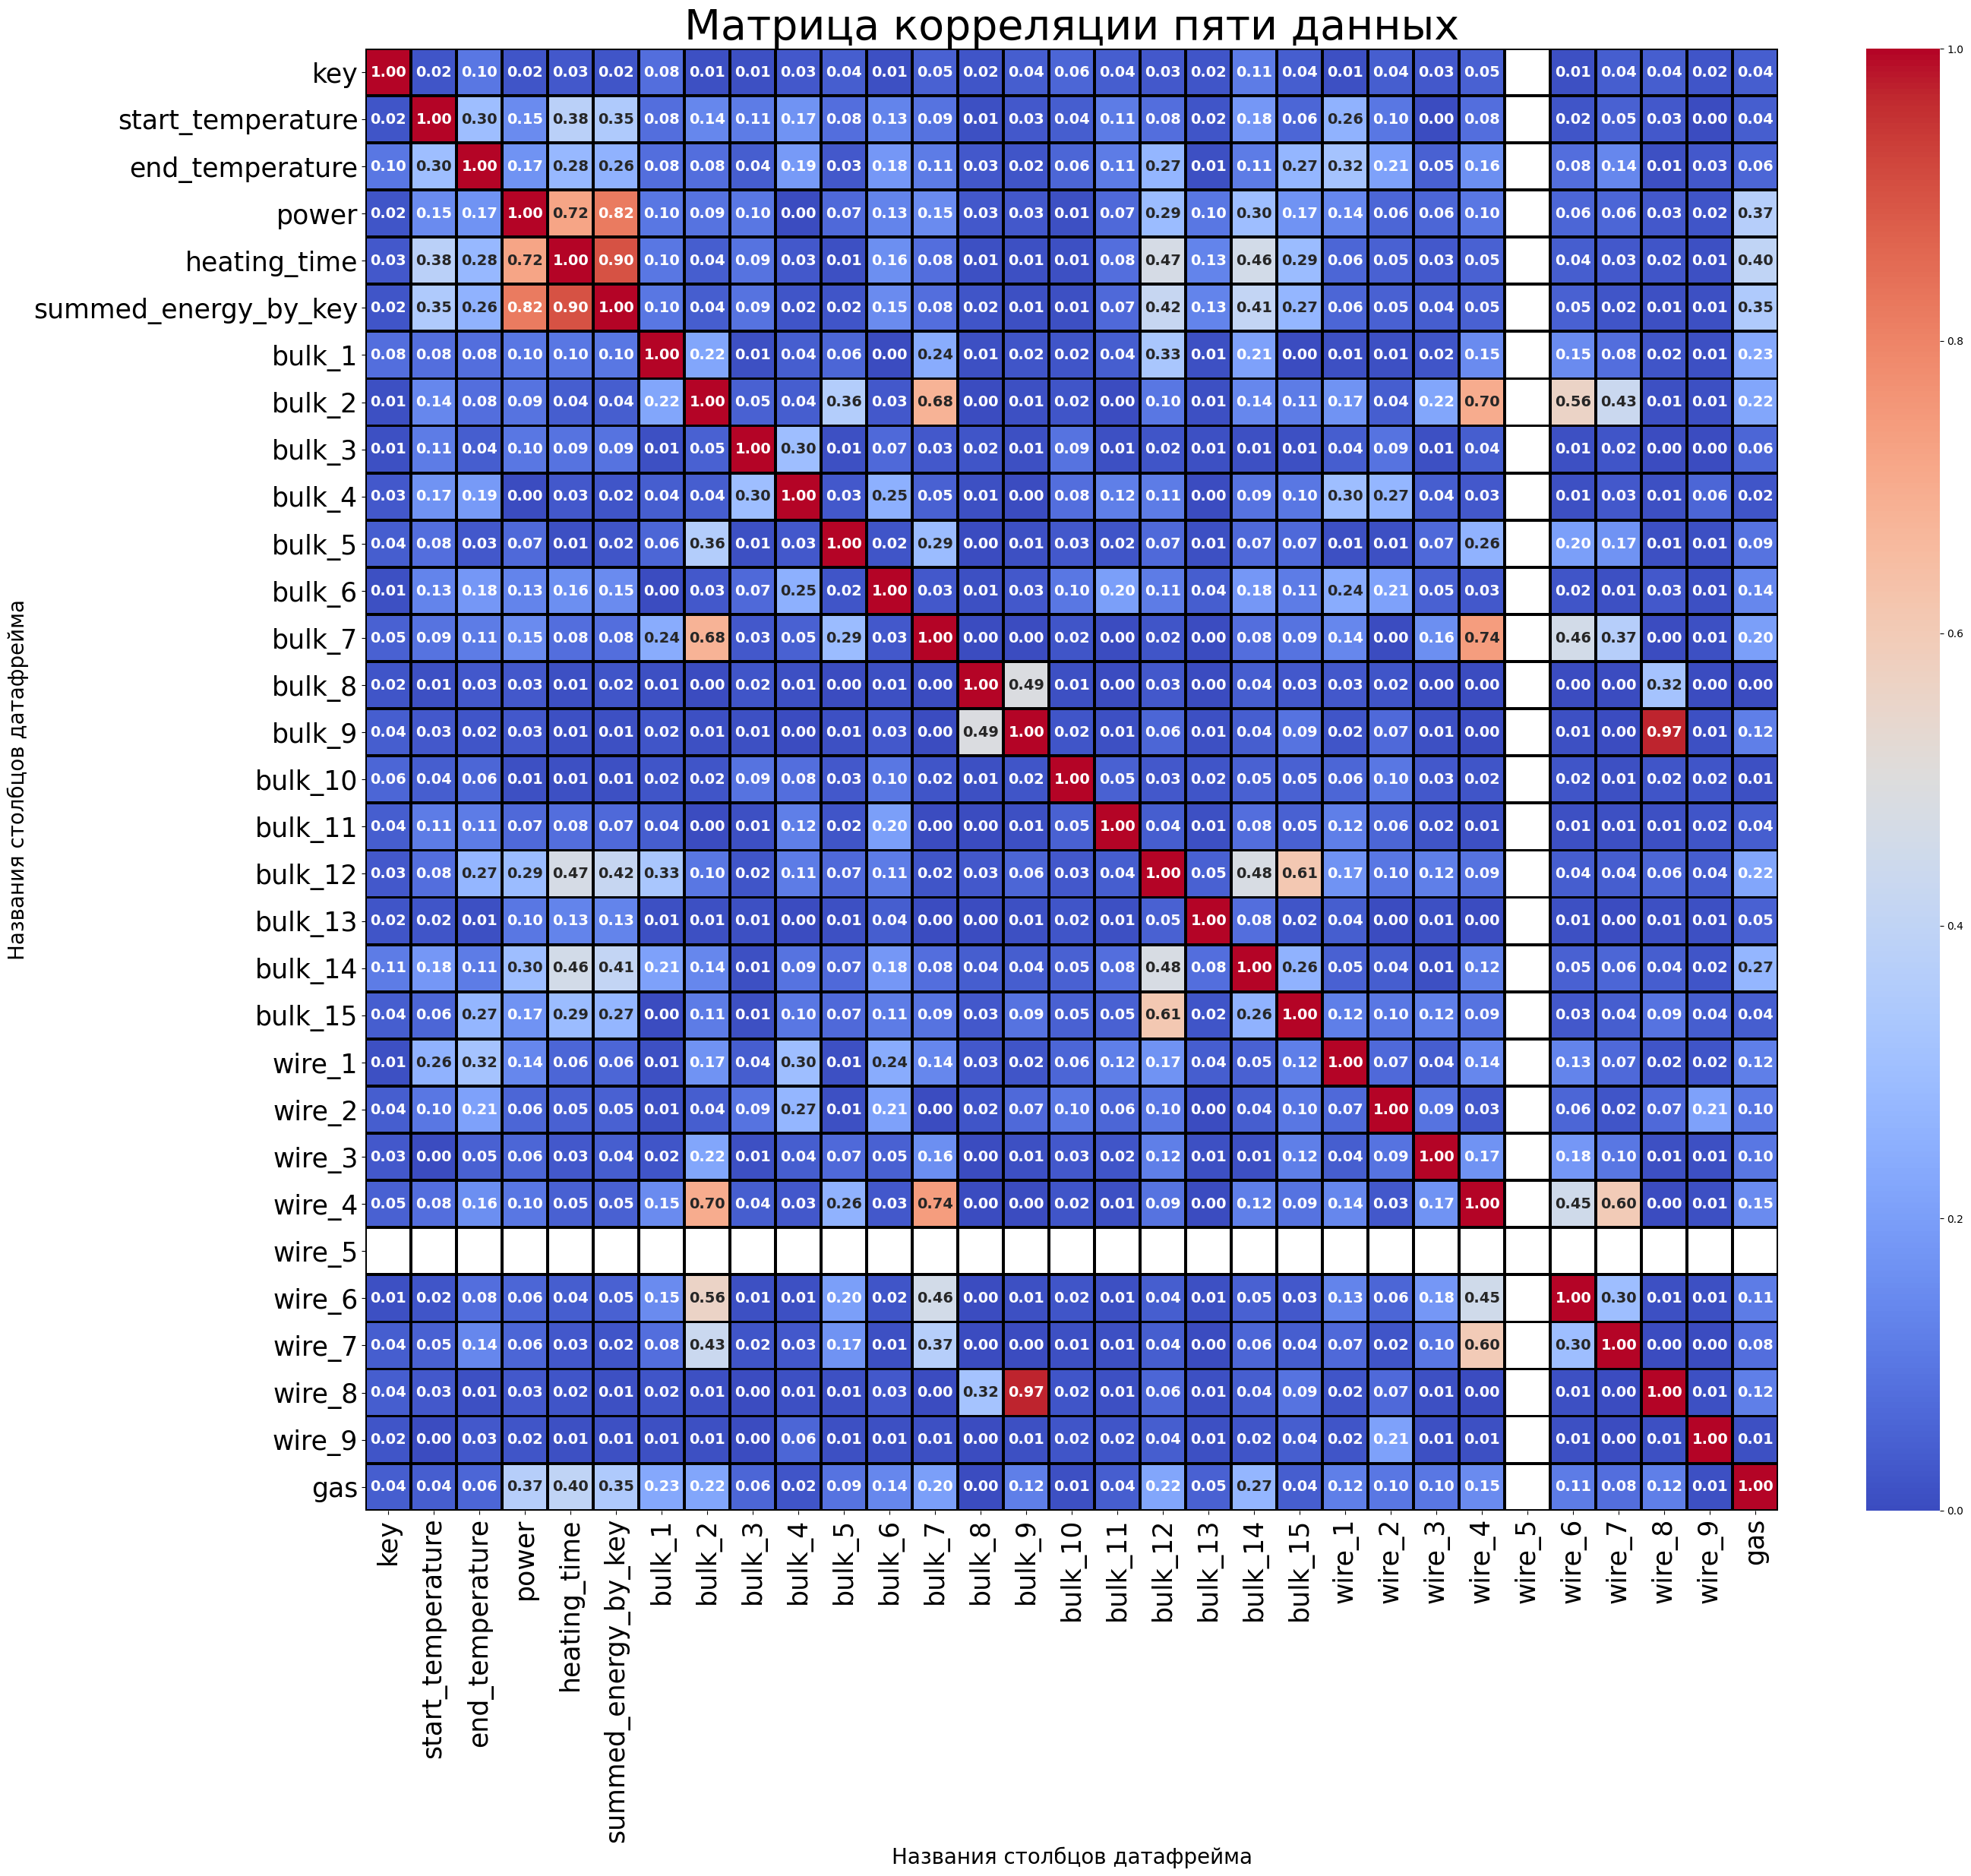

In [103]:
plt.figure(figsize=(30, 25))

# Вычисление матрицы корреляции и округление до двух знаков после запятой, а также устраняем минусы - используем модуль
corr_matrix = np.abs(big_data.corr().round(2))

# Построение тепловой карты корреляции
heatmap = sb.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    annot_kws={"size": 14, "weight": "bold"}, 
    linewidths=2,
    linecolor='black');

# Применение настроек шрифта
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

heatmap.set_ylabel('Названия столбцов датафрейма', fontdict={'size': 20})
heatmap.set_xlabel('Названия столбцов датафрейма', fontdict={'size': 20})

# Добавление заголовка
plt.title('Матрица корреляции пяти данных', fontdict={'size': 40});

plt.show()

Как и видно, что присутствуют пропуски в колонках `Wire 5`, устраним их. Также устраним номер партии `key`

Пусть допустимый предел скоррелированные признаки - `0.9`. Тогда устраним их - `Bulk 9` и `Wire 8`

In [104]:
big_data = big_data.drop('wire_5', axis=1)
big_data = big_data.drop('key', axis=1)

# Скоррелированные признаки 
big_data = big_data.drop('bulk_9', axis=1)
big_data = big_data.drop('wire_8', axis=1)

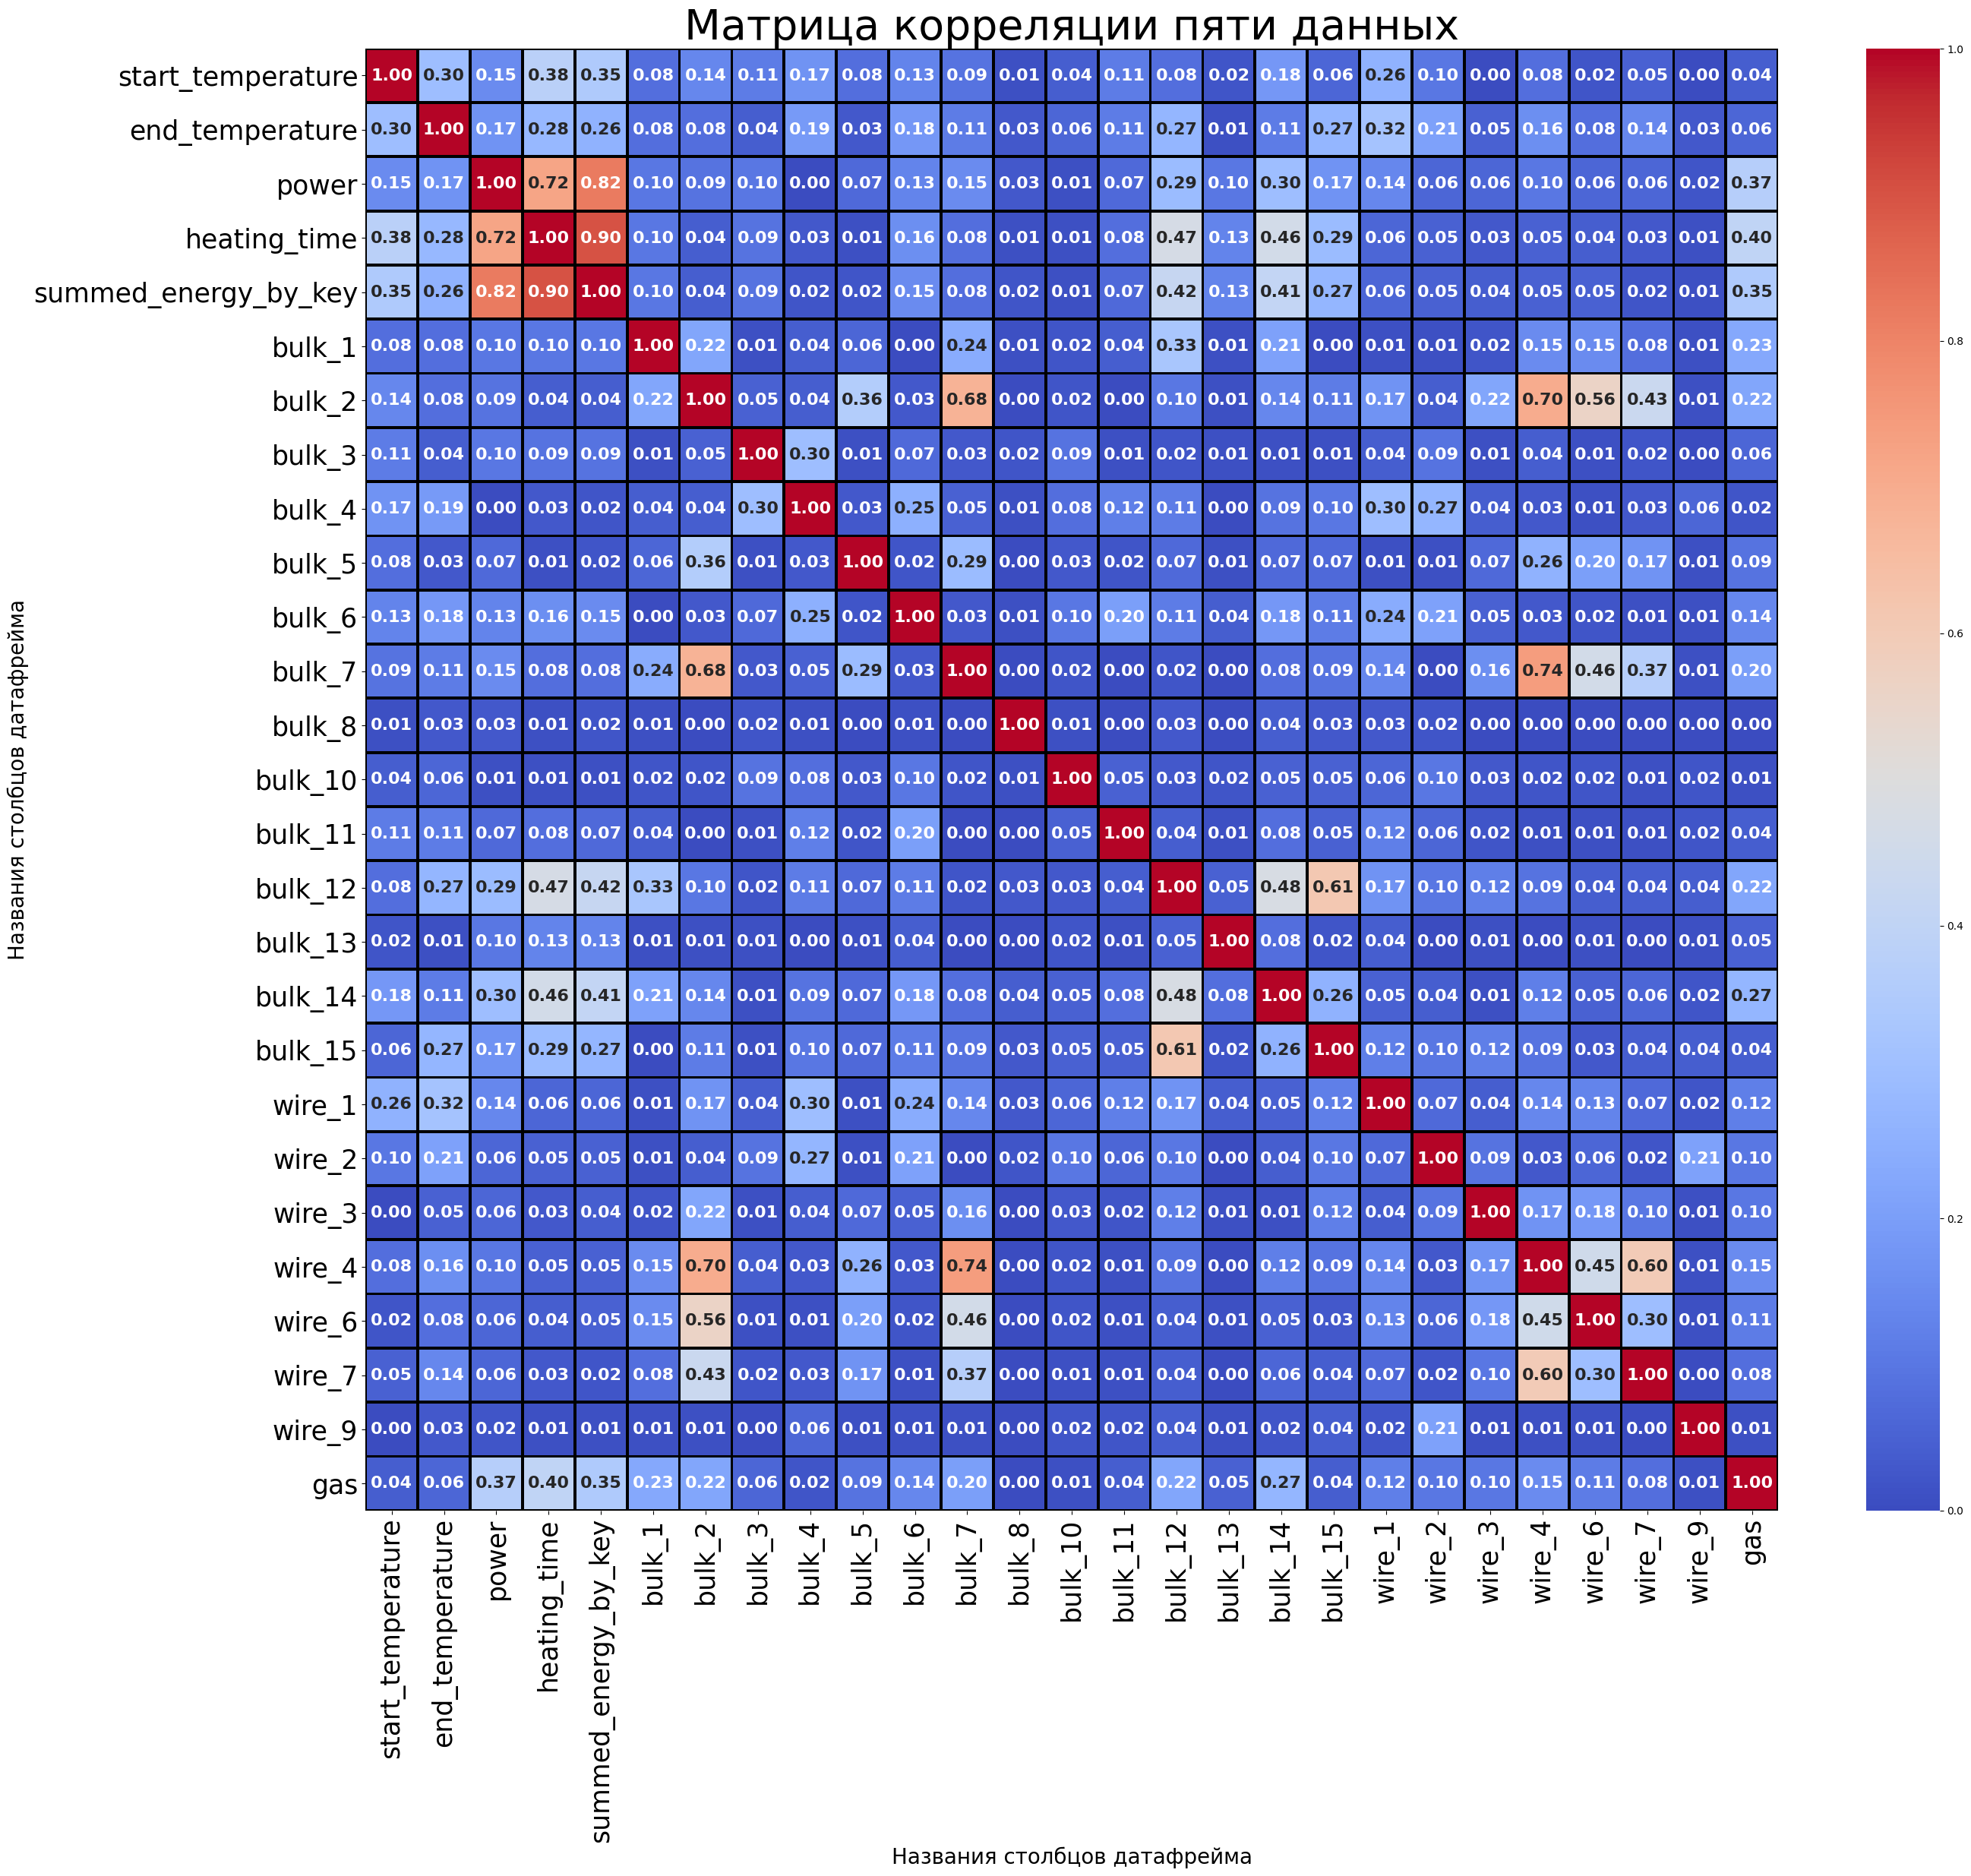

In [105]:
plt.figure(figsize=(30, 25))

# Вычисление матрицы корреляции и округление до двух знаков после запятой, а также устраняем минусы - используем модуль
corr_matrix = np.abs(big_data.corr().round(2))

# Построение тепловой карты корреляции
heatmap = sb.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    annot_kws={"size": 16, "weight": "bold"}, 
    linewidths=2,
    linecolor='black');

# Применение настроек шрифта
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

heatmap.set_ylabel('Названия столбцов датафрейма', fontdict={'size': 20})
heatmap.set_xlabel('Названия столбцов датафрейма', fontdict={'size': 20})

# Добавление заголовка
plt.title('Матрица корреляции пяти данных', fontdict={'size': 40});

plt.show()

С корреляцией пяти данных мы уже рассмотрели в исследовательских этапах. Здесь обратим внимание на корреляцию признаков `Bulk` с `Wire`.

Существуют положительная корреляция:
- `Bulk 2` и `Wire 4`
- `Bulk 2` и `Wire 6`
- `Bulk 2` и `Wire 7`

- `Bulk 7` и `Wire 4`
- `Bulk 7` и `Wire 6`
- `Bulk 7` и `Wire 7`

И при увеличении времени нагрева [c] увеличается суммарная энергии по партии
- `Heating time` и `Summed energy by key`

Существуют сильно положительная корреляция:
- `Bulk 9` и `Wire 8`
Но мы устранили это еще раньше

В большинствах случаях корреляция очень слабо отрицательная либо очень близки к нулю

##### Основываясь на этом можно сделать вывод:

- Убрали сильно положительную корреляцию `Bulk 9` и `Wire 8`, потому что их нельзя оставить, т.к. это сказывается на обучение линейным методом. Потому что, если есть мультиколлинеарности, то переменные модели становятся сильно зависимыми друг от друга, что это может делать оценку влияния каждой переменной на целевую переменную менее надежной. Что и может привести к нестабильности модели и переобучению. Не говоря уж о сложности интерпретации и низкой устойчивости модели.

- Положительная корреляция у нас есть несколько, и они говорят о том, что они движутся в одном направлении: при увеличении значения одной переменной, значение другой переменной также увеличивается. Т.е. что получается в итоге, при увеличении объема сыпучих материалов потребовались увеличению объемов проволочных материалов.

- Отрицательная корреляция (в нашем случае, когда значение равно или близки к нулю (темный цвет синий)) у нас их довольно много, и они говорят о том, что при увеличении объема сыпучих материалов потребовались уменьшению объемов проволочных материалов, иным словами можно сказать, что объем спыучих материалов независимо зависит от объема проволочных материалов.

## Промежуточный вывод

После предобработки данных мы сэкономили почти на 50-80% памяти. Также заполнили пропуски, проверили на наличии дубликатов. 

Также устранили не только огромные выбросы, но и выбросы, в которых температура плавления стали меньше `1500` градусов по цельсии. Рассмотрели корреляцию объединенных признаков, сделали небольшие выводы по ней.

In [106]:
big_data.describe()

,start_temperature,end_temperature,power,heating_time,summed_energy_by_key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,...,bulk_14,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_9,gas
count,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,...,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000
mean,1587.368774,1593.372681,3.886143,808.196644,670.232396,3.435026,1.425559,47.317127,37.347675,2.645869,...,153.952667,120.078316,102.423897,17.613213,3.241876,0.307209,0.980926,0.006374,0.317795,11.378854
std,23.627590,11.207458,1.517584,340.813828,319.526708,12.424463,19.102530,75.238052,58.677891,22.426054,...,81.410545,84.655968,43.540974,33.648178,27.972523,4.762842,8.702531,0.205926,3.460248,6.397007
min,1519.000000,1541.000000,0.331897,57.000000,33.430209,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008399
25%,1571.000000,1587.000000,2.846893,581.000000,457.924986,0.000000,0.000000,0.000000,0.000000,0.000000,...,105.000000,0.000000,73.204559,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.282534
50%,1587.000000,1593.000000,3.770584,778.000000,631.228861,0.000000,0.000000,0.000000,0.000000,0.000000,...,149.000000,107.000000,101.103600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.100686
75%,1603.000000,1598.000000,4.769753,993.000000,841.824195,0.000000,0.000000,80.000000,77.250000,0.000000,...,204.000000,204.000000,128.075222,23.102560,0.000000,0.000000,0.000000,0.000000,0.000000,14.218486
max,1660.000000,1653.000000,15.288272,4189.000000,4546.405938,185.000000,325.000000,454.000000,281.000000,603.000000,...,636.000000,405.000000,330.314423,282.780151,385.008667,113.231041,180.454575,8.490040,62.025600,77.995041


# Машинное обучение 

In [107]:
RANDOM_STATE = 50623

## Деление на обучающей и валидационной выборки

In [108]:
features = big_data.drop(['end_temperature', 'start_time', 'end_time'], axis=1)
target = big_data['end_temperature']

In [109]:
# Сохраним исходные типы данных
dtypes_features = features.dtypes
dtypes_target = target.dtypes

In [110]:
# Разделим обучающую и валидационную выборку
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE)

In [111]:
# Восстанавливаем исходные типы
features_train = features_train.astype(dtypes_features)
features_test = features_test.astype(dtypes_features)
target_train = target_train.astype(dtypes_target)
target_test = target_test.astype(dtypes_target)

In [112]:
print('Размер признаков обучающей выборки:', features_train.shape)
print('Размер целевого признака обучающей выборки:', target_train.shape)

Размер признаков обучающей выборки: (1743, 26)
Размер целевого признака обучающей выборки: (1743,)


In [113]:
print('Размер признаков тестовой выборки:', features_test.shape)
print('Размер целевого признака тестовой выборки:', target_test.shape)

Размер признаков тестовой выборки: (581, 26)
Размер целевого признака тестовой выборки: (581,)


## Масштабируем признаки

Для деревьев стандартизация точно не важна, поскольку разбиения всегда идут по одному конкретному признаку и масштаб соседних признаков никак на это не влияет.
Однако на самом деле на простой линейной регрессии стандартизация также не окажет никакого влияния, поскольку все изменения переменной можно нивелировать за счет изменения коэффициента:

$y = \alpha + \beta X$ - без стандартизации

$y = \alpha_{st} + \beta_{st} \frac{X-mean}{std} = (\alpha_{st} - \frac{\beta_{st}mean}{std}) + (\frac{\beta_{st}}{std}) X$ - со стандартизацией

При этом $\alpha = (\alpha_{st} - \frac{\beta_{st}mean}{std})$ и $\beta = (\frac{\beta_{st}}{std})$.

In [114]:
# Масштабируем признаки: обучающую и валидационную выборку
scaler = StandardScaler()

In [115]:
# Создадим список названий колонок, в котором не должно быть 'Конечная температура' и колонки типа 'float32', потому что конфликтует с типом данных datetime[ns]
numeric_features = [column for column in big_data.columns if column != 'end_temperature' and big_data[column].dtype == 'float32']

In [116]:
# Преобразуем обучающую, валидационную выборки функцией transform(), т.е.
# обучаем его на численных признаках тренировочной выборки, трансформируем её же
features_train[numeric_features] = scaler.fit_transform(features_train[numeric_features])
features_test[numeric_features] = scaler.transform(features_test[numeric_features])

In [117]:
# Проверим
print(features_train.shape)
print(features_test.shape)

(1743, 26)
(581, 26)


In [118]:
print('Размер обучающей выборки:', round(features_train.shape[0] / features.shape[0], 2), '%')
print('Размер валидационной выборки:', round(features_test.shape[0] / target.shape[0], 2), '%')

Размер обучающей выборки: 0.75 %
Размер валидационной выборки: 0.25 %


In [119]:
display(features_train.head())

display(features_test.head())

,start_temperature,power,heating_time,summed_energy_by_key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,...,bulk_14,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_9,gas
2163,-0.126462,-0.679055,678.0,461.114879,-0.278423,-0.071572,-0.630744,1.724848,-0.113604,-0.419238,...,-0.080278,-0.180127,-0.262477,-0.246183,-0.119171,-0.059751,-0.11876,-0.02673,-0.102043,-0.913752
1464,-0.932629,2.971614,1216.0,1139.070683,-0.278423,-0.071572,0.183782,-0.619391,-0.113604,-0.419238,...,0.564257,1.054773,0.424907,0.069425,-0.119171,-0.059751,-0.11876,-0.02673,-0.102043,0.529208
837,-0.975058,0.011935,1380.0,1074.319957,-0.278423,-0.071572,2.023035,-0.619391,-0.113604,2.361367,...,2.461380,1.031025,-1.291056,0.524593,-0.119171,-0.059751,-0.11876,-0.02673,-0.102043,-1.451547
45,-0.593190,0.378145,685.0,610.520915,-0.278423,-0.071572,-0.630744,-0.619391,-0.113604,2.627030,...,-1.867952,-1.415027,-0.671854,0.886878,-0.119171,-0.059751,-0.11876,-0.02673,-0.102043,-0.500446
1894,-0.508330,0.012452,586.0,507.122889,-0.278423,-0.071572,0.078682,-0.619391,-0.113604,1.015342,...,1.196632,-1.415027,-1.062261,0.038411,-0.119171,-0.059751,-0.11876,-0.02673,-0.102043,-0.103796


,start_temperature,power,heating_time,summed_energy_by_key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,...,bulk_14,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_9,gas
1578,-0.805339,-0.522062,873.0,689.391073,-0.278423,-0.071572,-0.630744,-0.619391,-0.113604,2.113415,...,-0.299177,-0.144505,0.651705,2.165571,-0.119171,-0.059751,-0.11876,-0.02673,-0.102043,-0.444587
2148,1.401012,-0.710402,506.0,437.227905,-0.278423,-0.071572,0.814383,0.527061,-0.113604,-0.419238,...,-1.867952,-1.415027,-0.813639,-0.538987,-0.119171,-0.059751,-0.11876,-0.02673,-0.102043,-0.623033
1528,0.085687,0.939909,646.0,529.236850,-0.278423,-0.071572,0.604183,-0.619391,-0.113604,-0.419238,...,1.756040,-1.415027,0.559702,3.486380,-0.119171,-0.059751,-0.11876,-0.02673,-0.102043,0.703935
1795,1.061573,1.947405,916.0,799.312603,-0.278423,-0.071572,0.144370,-0.619391,-0.113604,0.731968,...,0.916928,1.054773,0.812888,-0.538987,-0.119171,-0.059751,-0.11876,-0.02673,-0.102043,0.699207
629,1.019143,-0.791730,316.0,264.239082,-0.278423,-0.071572,0.039269,-0.619391,-0.113604,-0.419238,...,-0.250533,-0.761955,-0.126041,-0.538987,-0.119171,-0.059751,-0.11876,-0.02673,-0.102043,-0.848181


In [120]:
# Здесь будем сохранить результаты машинного обучения
results = pd.DataFrame()

# А это будет счетчтиком для нумерация моеделй
count_model = 0

## Построение модели и обучение

### Линейные методы

#### LinearRegression

In [121]:
# Устанавливаем нужные параметры
parameters = {}

# Инициализируем модель
model = GridSearchCV(LinearRegression(), param_grid = parameters, cv = 5, scoring = 'neg_mean_absolute_error')

In [122]:
%%notify -m "LinearRegression"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE обучающей выборки:', result_MAE_t)
print('Время обучения [s]:', round(time, 2))

MAE обучающей выборки: 6.547013137273895
Время обучения [s]: 0.0
CPU times: user 135 ms, sys: 462 µs, total: 135 ms
Wall time: 20.4 ms


<IPython.core.display.Javascript object>

In [123]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'Название модели': 'LinearRegression', 
    'MAE обучающей выборки': result_MAE_t,  
    'Время обучения в обучающей выборки [s]': time, 
    'Лучшие гиперпараметры': params
})

results[count_model]
count_model+=1

####  Ridge Regression

In [124]:
# Матрица гиперпараметров для Ridge Regression
parameters = {'alpha': [0.1, 1.0, 10.0],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']}


# Инициализируем модель c параметрами
model = GridSearchCV(Ridge(random_state = RANDOM_STATE), parameters, cv = 5, scoring = 'neg_mean_absolute_error')

In [125]:
%%notify -m "Ridge Regression"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE обучающей выборки:', result_MAE_t)
print('Время обучения [s]:', round(time, 2))

MAE обучающей выборки: 6.291203012778941
Время обучения [s]: 0.0
CPU times: user 1.89 s, sys: 43.3 ms, total: 1.93 s
Wall time: 242 ms


<IPython.core.display.Javascript object>

In [126]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'Название модели': 'Ridge Regression', 
    'MAE обучающей выборки': result_MAE_t,  
    'Время обучения в обучающей выборки [s]': time, 
    'Лучшие гиперпараметры': params
})

results[count_model]
count_model+=1

####  ElasticNet

In [127]:
# Матрица гиперпараметров для ElasticNet
parameters = {'alpha': [0.1, 1.0, 10.0],
              'l1_ratio': [0.25, 0.5, 0.75],
              'max_iter': [1000, 2000, 3000]}

# Инициализируем модель c параметрами
model = GridSearchCV(ElasticNet(random_state = RANDOM_STATE), parameters, cv = 5, scoring = 'neg_mean_absolute_error')

In [128]:
%%notify -m "ElasticNet"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE обучающей выборки:', result_MAE_t)
print('Время обучения [s]:', round(time, 2))

MAE обучающей выборки: 6.26934155298631
Время обучения [s]: 0.0
CPU times: user 1.4 s, sys: 38 ms, total: 1.44 s
Wall time: 492 ms


<IPython.core.display.Javascript object>

In [129]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'Название модели': 'ElasticNet', 
    'MAE обучающей выборки': result_MAE_t,  
    'Время обучения в обучающей выборки [s]': time, 
    'Лучшие гиперпараметры': params
})

results[count_model]
count_model+=1

####  Bayesian Ridge Regression

In [130]:
# Матрица гиперпараметров для Bayesian Ridge Regression
parameters = {'alpha_1': [1e-6, 1e-5, 1e-4],
              'alpha_2': [1e-6, 1e-5, 1e-4],
              'lambda_1': [1e-6, 1e-5, 1e-4],
              'lambda_2': [1e-6, 1e-5, 1e-4],
              'fit_intercept': [True, False]}

# Инициализируем модель c параметрами
model = GridSearchCV(BayesianRidge(), parameters, cv = 5, scoring = 'neg_mean_absolute_error')

In [131]:
%%notify -m "Bayesian Ridge Regression"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE обучающей выборки:', result_MAE_t)
print('Время обучения [s]:', round(time, 2))

MAE обучающей выборки: 6.365591315043997
Время обучения [s]: 0.0
CPU times: user 27.5 s, sys: 685 ms, total: 28.2 s
Wall time: 3.53 s


<IPython.core.display.Javascript object>

In [132]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'Название модели': 'Bayesian Ridge Regression', 
    'MAE обучающей выборки': result_MAE_t,  
    'Время обучения в обучающей выборки [s]': time, 
    'Лучшие гиперпараметры': params
})

results[count_model]
count_model+=1

####  RidgeCV 

In [133]:
# Матрица гиперпараметров для GaussianProcessRegressor
parameters = {'alphas': [0.1, 1.0, 10.0]}

# Инициализируем модель c параметрами
model = GridSearchCV(RidgeCV(), parameters, cv = 5, scoring = 'neg_mean_absolute_error')

In [134]:
%%notify -m "RidgeCV"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE обучающей выборки:', result_MAE_t)
print('Время обучения [s]:', round(time, 2))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/redalexdad/.local/lib/python3.9/site-packages/IPython/core/magics/execution.py", line 1318, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 2, in <module>
  File "/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    all_args.append(name)
  File "/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 876, in fit
    # multimetric is determined here because in the case of a callable
  File "/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    all_args.append(name)
  File "/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/base.py", line 85, in clone
RuntimeError: Cannot clone object RidgeCV(alphas=10.0), as the constructor either does not set or modifies parameter alphas

During handling of the abov

<IPython.core.display.Javascript object>

In [135]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'Название модели': 'RidgeCV', 
    'MAE обучающей выборки': result_MAE_t,  
    'Время обучения в обучающей выборки [s]': time, 
    'Лучшие гиперпараметры': params
})

results[count_model]
count_model+=1

### Методы деревьев

#### DecisionTreeRegressor

In [136]:
# Матрица гиперпараметров
parameters = {'max_depth': range(1, 1001, 10), 'min_samples_leaf': [1, 0.1, 2]}

# Инициализируем модель c параметрами
model = GridSearchCV(DecisionTreeRegressor(random_state = RANDOM_STATE), param_grid = parameters, cv = 5, scoring = 'neg_mean_absolute_error')

In [137]:
%%notify -m "DecisionTreeRegressor"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE обучающей выборки:', result_MAE_t)
print('Время обучения [s]:', round(time, 2))

MAE обучающей выборки: 7.599570875012327
Время обучения [s]: 0.0
CPU times: user 15 s, sys: 15.1 ms, total: 15.1 s
Wall time: 15.1 s


<IPython.core.display.Javascript object>

In [138]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'Название модели': 'DecisionTreeRegressor', 
    'MAE обучающей выборки': result_MAE_t,  
    'Время обучения в обучающей выборки [s]': time, 
    'Лучшие гиперпараметры': params
})

results[count_model]
count_model+=1

#### RandomForestRegressor

In [139]:
# Матрица гиперпараметров для случайного леса
parameters = {'bootstrap': [True], 'max_depth': [5, 15, 30, 50, 100], 'max_features': ['log2'], 'n_estimators': [25, 50, 100, 300, 500]}

# Инициализируем модель c параметрами
model = GridSearchCV(RandomForestRegressor(random_state = RANDOM_STATE), parameters, cv = 5, scoring = 'neg_mean_absolute_error')

In [140]:
%%notify -m "RandomForestRegressor"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE обучающей выборки:', result_MAE_t)
print('Время обучения [s]:', round(time, 2))

MAE обучающей выборки: 6.407571363644861
Время обучения [s]: 1.2
CPU times: user 44.6 s, sys: 127 ms, total: 44.8 s
Wall time: 44.8 s


<IPython.core.display.Javascript object>

In [141]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'Название модели': 'RandomForestRegressor', 
    'MAE обучающей выборки': result_MAE_t,  
    'Время обучения в обучающей выборки [s]': time, 
    'Лучшие гиперпараметры': params
})

results[count_model]
count_model+=1

####  ExtraTreesRegressor

In [142]:
# Матрица гиперпараметров для ExtraTreesRegressor
parameters = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2']}

# Инициализируем модель c параметрами
model = GridSearchCV(ExtraTreesRegressor(random_state = RANDOM_STATE), parameters, cv = 5, scoring = 'neg_mean_absolute_error')

In [143]:
%%notify -m "ExtraTreesRegressor"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE обучающей выборки:', result_MAE_t)
print('Время обучения [s]:', round(time, 2))

MAE обучающей выборки: 6.435193508546606
Время обучения [s]: 0.36
CPU times: user 1min 54s, sys: 223 ms, total: 1min 54s
Wall time: 1min 54s


<IPython.core.display.Javascript object>

In [144]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'Название модели': 'ExtraTreesRegressor', 
    'MAE обучающей выборки': result_MAE_t,  
    'Время обучения в обучающей выборки [s]': time, 
    'Лучшие гиперпараметры': params
})

results[count_model]
count_model+=1

### Градиетные бустинги

####  AdaBoostRegressor

In [145]:
# Матрица гиперпараметров для AdaBoostRegressor
parameters = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1.0],
              'loss': ['linear', 'square', 'exponential']}

# Инициализируем модель c параметрами
model = GridSearchCV(AdaBoostRegressor(random_state = RANDOM_STATE), parameters, cv = 5, scoring = 'neg_mean_absolute_error')

In [146]:
%%notify -m "AdaBoostRegressor"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE обучающей выборки:', result_MAE_t)
print('Время обучения [s]:', round(time, 2))

MAE обучающей выборки: 7.005790177777304
Время обучения [s]: 0.19
CPU times: user 37.3 s, sys: 55.9 ms, total: 37.4 s
Wall time: 37.4 s


<IPython.core.display.Javascript object>

In [147]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'Название модели': 'AdaBoostRegressor', 
    'MAE обучающей выборки': result_MAE_t,  
    'Время обучения в обучающей выборки [s]': time, 
    'Лучшие гиперпараметры': params
})

results[count_model]
count_model+=1

#### LightGBMRegressor

In [148]:
# Матрица гиперпараметров для LightGBMRegressor
parameters = {'num_leaves': [5, 10, 30, 50],
              'learning_rate': [0.1, 0.3, 0.5, 1.0],
              'max_depth': [3, 5, 10, 15, 20],
              'n_estimators': [10, 25, 50, 75]}

# Инициализируем модель c параметрами
model = GridSearchCV(LGBMRegressor(random_state = RANDOM_STATE), parameters, cv = 5, scoring = 'neg_mean_absolute_error')

In [149]:
%%notify -m "LightGBMRegressor"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE обучающей выборки:', result_MAE_t)
print('Время обучения [s]:', round(time, 2))

MAE обучающей выборки: 6.171847876667512
Время обучения [s]: 0.02
CPU times: user 8min 26s, sys: 5.81 s, total: 8min 32s
Wall time: 32.3 s


<IPython.core.display.Javascript object>

In [150]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'Название модели': 'LightGBMRegressor', 
    'MAE обучающей выборки': result_MAE_t,  
    'Время обучения в обучающей выборки [s]': time, 
    'Лучшие гиперпараметры': params
})

results[count_model]
count_model+=1

#### CatBoostRegressor

In [151]:
# Матрица гиперпараметров для CatBoostRegressor
parameters = {'depth' : [6, 8, 10, 15],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations' : [10, 15, 20]}

# Инициализируем модель c параметрами
model = GridSearchCV(CatBoostRegressor(random_state = RANDOM_STATE), parameters, cv = 5, scoring = 'neg_mean_absolute_error')

In [152]:
%%notify -m "CatBoostRegressor"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE обучающей выборки:', result_MAE_t)
print('Время обучения [s]:', round(time, 2))

0:	learn: 11.1042793	total: 47.1ms	remaining: 424ms
1:	learn: 11.0744245	total: 48.2ms	remaining: 193ms
2:	learn: 11.0466656	total: 49.2ms	remaining: 115ms
3:	learn: 11.0157450	total: 50.1ms	remaining: 75.1ms
4:	learn: 10.9876293	total: 51ms	remaining: 51ms
5:	learn: 10.9622426	total: 51.9ms	remaining: 34.6ms
6:	learn: 10.9352369	total: 52.8ms	remaining: 22.6ms
7:	learn: 10.9053529	total: 53.7ms	remaining: 13.4ms
8:	learn: 10.8760490	total: 54.6ms	remaining: 6.07ms
9:	learn: 10.8486233	total: 55.5ms	remaining: 0us
0:	learn: 11.0527366	total: 1.06ms	remaining: 9.55ms
1:	learn: 11.0198940	total: 2.02ms	remaining: 8.09ms
2:	learn: 10.9909527	total: 3ms	remaining: 7.01ms
3:	learn: 10.9601875	total: 3.98ms	remaining: 5.97ms
4:	learn: 10.9306066	total: 4.98ms	remaining: 4.98ms
5:	learn: 10.9026100	total: 5.96ms	remaining: 3.98ms
6:	learn: 10.8767188	total: 6.92ms	remaining: 2.97ms
7:	learn: 10.8522615	total: 7.91ms	remaining: 1.98ms
8:	learn: 10.8260677	total: 9.34ms	remaining: 1.04ms
9:	lea

0:	learn: 11.0527366	total: 1.48ms	remaining: 20.8ms
1:	learn: 11.0198940	total: 2.89ms	remaining: 18.8ms
2:	learn: 10.9909527	total: 4.04ms	remaining: 16.1ms
3:	learn: 10.9601875	total: 5.12ms	remaining: 14.1ms
4:	learn: 10.9306066	total: 6.09ms	remaining: 12.2ms
5:	learn: 10.9026100	total: 7.05ms	remaining: 10.6ms
6:	learn: 10.8767188	total: 8.02ms	remaining: 9.16ms
7:	learn: 10.8522615	total: 8.96ms	remaining: 7.84ms
8:	learn: 10.8260677	total: 9.7ms	remaining: 6.46ms
9:	learn: 10.7971752	total: 10.5ms	remaining: 5.23ms
10:	learn: 10.7656884	total: 11.2ms	remaining: 4.08ms
11:	learn: 10.7355500	total: 11.9ms	remaining: 2.97ms
12:	learn: 10.7088880	total: 12.6ms	remaining: 1.94ms
13:	learn: 10.6839547	total: 13.4ms	remaining: 957us
14:	learn: 10.6642795	total: 14.2ms	remaining: 0us
0:	learn: 10.9231904	total: 1.51ms	remaining: 21.1ms
1:	learn: 10.8940773	total: 2.92ms	remaining: 19ms
2:	learn: 10.8628856	total: 4.28ms	remaining: 17.1ms
3:	learn: 10.8331765	total: 5.65ms	remaining: 15

5:	learn: 9.6429782	total: 7.16ms	remaining: 10.7ms
6:	learn: 9.4758156	total: 8.02ms	remaining: 9.16ms
7:	learn: 9.3000944	total: 8.72ms	remaining: 7.63ms
8:	learn: 9.1636508	total: 9.4ms	remaining: 6.26ms
9:	learn: 9.0673732	total: 10.2ms	remaining: 5.09ms
10:	learn: 8.9564014	total: 10.9ms	remaining: 3.98ms
11:	learn: 8.8532860	total: 11.6ms	remaining: 2.91ms
12:	learn: 8.7489701	total: 12.4ms	remaining: 1.9ms
13:	learn: 8.6854010	total: 13.1ms	remaining: 933us
14:	learn: 8.6052309	total: 13.8ms	remaining: 0us
0:	learn: 11.0502049	total: 1.74ms	remaining: 24.4ms
1:	learn: 10.7627600	total: 2.9ms	remaining: 18.9ms
2:	learn: 10.4985034	total: 3.92ms	remaining: 15.7ms
3:	learn: 10.2559486	total: 4.98ms	remaining: 13.7ms
4:	learn: 10.0822485	total: 5.98ms	remaining: 12ms
5:	learn: 9.9147642	total: 6.94ms	remaining: 10.4ms
6:	learn: 9.7731862	total: 7.84ms	remaining: 8.96ms
7:	learn: 9.6556282	total: 8.73ms	remaining: 7.64ms
8:	learn: 9.5095778	total: 9.57ms	remaining: 6.38ms
9:	learn: 9

0:	learn: 10.8144910	total: 1.37ms	remaining: 26.1ms
1:	learn: 10.6771966	total: 2.6ms	remaining: 23.4ms
2:	learn: 10.5423204	total: 3.53ms	remaining: 20ms
3:	learn: 10.4166923	total: 4.56ms	remaining: 18.2ms
4:	learn: 10.3117365	total: 5.52ms	remaining: 16.6ms
5:	learn: 10.1887955	total: 6.59ms	remaining: 15.4ms
6:	learn: 10.0765561	total: 7.48ms	remaining: 13.9ms
7:	learn: 9.9619605	total: 8.36ms	remaining: 12.5ms
8:	learn: 9.8604638	total: 9.28ms	remaining: 11.3ms
9:	learn: 9.7840204	total: 9.96ms	remaining: 9.96ms
10:	learn: 9.7012048	total: 10.7ms	remaining: 8.73ms
11:	learn: 9.6159063	total: 11.4ms	remaining: 7.57ms
12:	learn: 9.5285806	total: 12.1ms	remaining: 6.51ms
13:	learn: 9.4445335	total: 12.8ms	remaining: 5.47ms
14:	learn: 9.3616642	total: 13.6ms	remaining: 4.53ms
15:	learn: 9.2849285	total: 14.3ms	remaining: 3.58ms
16:	learn: 9.2147528	total: 15ms	remaining: 2.65ms
17:	learn: 9.1402064	total: 15.8ms	remaining: 1.76ms
18:	learn: 9.0728266	total: 16.6ms	remaining: 872us
19

0:	learn: 11.1014867	total: 4.17ms	remaining: 37.6ms
1:	learn: 11.0694605	total: 7.55ms	remaining: 30.2ms
2:	learn: 11.0382710	total: 10.4ms	remaining: 24.3ms
3:	learn: 11.0087102	total: 13.1ms	remaining: 19.7ms
4:	learn: 10.9810006	total: 16.3ms	remaining: 16.3ms
5:	learn: 10.9497805	total: 18.9ms	remaining: 12.6ms
6:	learn: 10.9208318	total: 21.6ms	remaining: 9.25ms
7:	learn: 10.8893152	total: 24.1ms	remaining: 6.03ms
8:	learn: 10.8593021	total: 26.6ms	remaining: 2.95ms
9:	learn: 10.8312984	total: 29.1ms	remaining: 0us
0:	learn: 11.0505983	total: 4.29ms	remaining: 38.6ms
1:	learn: 11.0198049	total: 7.69ms	remaining: 30.7ms
2:	learn: 10.9878563	total: 10.5ms	remaining: 24.6ms
3:	learn: 10.9556217	total: 13.2ms	remaining: 19.9ms
4:	learn: 10.9241438	total: 16ms	remaining: 16ms
5:	learn: 10.8944262	total: 18.7ms	remaining: 12.5ms
6:	learn: 10.8667231	total: 21.2ms	remaining: 9.1ms
7:	learn: 10.8388355	total: 23.4ms	remaining: 5.86ms
8:	learn: 10.8083129	total: 25.9ms	remaining: 2.87ms
9

0:	learn: 11.0505983	total: 3.24ms	remaining: 45.4ms
1:	learn: 11.0198049	total: 7.29ms	remaining: 47.4ms
2:	learn: 10.9878563	total: 9.89ms	remaining: 39.6ms
3:	learn: 10.9556217	total: 12.2ms	remaining: 33.5ms
4:	learn: 10.9241438	total: 14.5ms	remaining: 29.1ms
5:	learn: 10.8944262	total: 16.8ms	remaining: 25.3ms
6:	learn: 10.8667231	total: 19.1ms	remaining: 21.8ms
7:	learn: 10.8388355	total: 21.3ms	remaining: 18.6ms
8:	learn: 10.8083129	total: 23.4ms	remaining: 15.6ms
9:	learn: 10.7808194	total: 25.5ms	remaining: 12.8ms
10:	learn: 10.7513100	total: 27.7ms	remaining: 10.1ms
11:	learn: 10.7263159	total: 29.9ms	remaining: 7.46ms
12:	learn: 10.6976518	total: 32.1ms	remaining: 4.93ms
13:	learn: 10.6701900	total: 34.2ms	remaining: 2.44ms
14:	learn: 10.6400516	total: 36.4ms	remaining: 0us
0:	learn: 10.9209082	total: 3.68ms	remaining: 51.6ms
1:	learn: 10.8912751	total: 6.45ms	remaining: 41.9ms
2:	learn: 10.8594252	total: 9.17ms	remaining: 36.7ms
3:	learn: 10.8292046	total: 11.6ms	remaining

12:	learn: 8.6575322	total: 32.2ms	remaining: 4.96ms
13:	learn: 8.5512417	total: 34.7ms	remaining: 2.48ms
14:	learn: 8.4369888	total: 36.9ms	remaining: 0us
0:	learn: 10.6594490	total: 3.51ms	remaining: 49.1ms
1:	learn: 10.3734926	total: 7.01ms	remaining: 45.6ms
2:	learn: 10.0922735	total: 9.9ms	remaining: 39.6ms
3:	learn: 9.8379177	total: 12.6ms	remaining: 34.6ms
4:	learn: 9.6124333	total: 15.4ms	remaining: 30.7ms
5:	learn: 9.4188440	total: 17.6ms	remaining: 26.4ms
6:	learn: 9.2485227	total: 19.8ms	remaining: 22.6ms
7:	learn: 9.0989863	total: 22ms	remaining: 19.2ms
8:	learn: 8.9526405	total: 24.3ms	remaining: 16.2ms
9:	learn: 8.8126145	total: 26.3ms	remaining: 13.2ms
10:	learn: 8.6960340	total: 28.4ms	remaining: 10.3ms
11:	learn: 8.5815079	total: 30.5ms	remaining: 7.63ms
12:	learn: 8.4687052	total: 32.7ms	remaining: 5.03ms
13:	learn: 8.3599343	total: 34.8ms	remaining: 2.49ms
14:	learn: 8.2633236	total: 37ms	remaining: 0us
0:	learn: 10.7709857	total: 3.57ms	remaining: 50ms
1:	learn: 10.

0:	learn: 10.9334251	total: 3.21ms	remaining: 61ms
1:	learn: 10.7869591	total: 6.35ms	remaining: 57.1ms
2:	learn: 10.6452931	total: 9.32ms	remaining: 52.8ms
3:	learn: 10.5004460	total: 12.4ms	remaining: 49.6ms
4:	learn: 10.3690630	total: 15.1ms	remaining: 45.3ms
5:	learn: 10.2646184	total: 17.5ms	remaining: 40.9ms
6:	learn: 10.1509359	total: 19.8ms	remaining: 36.8ms
7:	learn: 10.0652472	total: 22.1ms	remaining: 33.2ms
8:	learn: 9.9544479	total: 24.4ms	remaining: 29.9ms
9:	learn: 9.8439460	total: 26.7ms	remaining: 26.7ms
10:	learn: 9.7393235	total: 28.9ms	remaining: 23.6ms
11:	learn: 9.6456171	total: 31ms	remaining: 20.7ms
12:	learn: 9.5508739	total: 33.2ms	remaining: 17.9ms
13:	learn: 9.4583453	total: 35.6ms	remaining: 15.2ms
14:	learn: 9.3595164	total: 37.7ms	remaining: 12.6ms
15:	learn: 9.2789049	total: 39.9ms	remaining: 9.98ms
16:	learn: 9.2001714	total: 42.1ms	remaining: 7.43ms
17:	learn: 9.1120685	total: 44.3ms	remaining: 4.92ms
18:	learn: 9.0360017	total: 46.6ms	remaining: 2.45ms

0:	learn: 11.1000769	total: 18.2ms	remaining: 164ms
1:	learn: 11.0694473	total: 29.4ms	remaining: 118ms
2:	learn: 11.0383398	total: 39.7ms	remaining: 92.6ms
3:	learn: 11.0060334	total: 50.1ms	remaining: 75.2ms
4:	learn: 10.9764757	total: 61.7ms	remaining: 61.7ms
5:	learn: 10.9412864	total: 72.7ms	remaining: 48.5ms
6:	learn: 10.9129331	total: 83.3ms	remaining: 35.7ms
7:	learn: 10.8808719	total: 93.6ms	remaining: 23.4ms
8:	learn: 10.8541128	total: 104ms	remaining: 11.5ms
9:	learn: 10.8248671	total: 115ms	remaining: 0us
0:	learn: 11.0502083	total: 13.5ms	remaining: 121ms
1:	learn: 11.0213489	total: 23.6ms	remaining: 94.3ms
2:	learn: 10.9881836	total: 33.2ms	remaining: 77.5ms
3:	learn: 10.9579882	total: 44.7ms	remaining: 67ms
4:	learn: 10.9266378	total: 54.9ms	remaining: 54.9ms
5:	learn: 10.8969253	total: 64.7ms	remaining: 43.2ms
6:	learn: 10.8631927	total: 74.9ms	remaining: 32.1ms
7:	learn: 10.8320803	total: 86ms	remaining: 21.5ms
8:	learn: 10.8019900	total: 96.9ms	remaining: 10.8ms
9:	le

0:	learn: 11.0502083	total: 11.1ms	remaining: 156ms
1:	learn: 11.0213489	total: 22.2ms	remaining: 144ms
2:	learn: 10.9881836	total: 32.4ms	remaining: 130ms
3:	learn: 10.9579882	total: 42.8ms	remaining: 118ms
4:	learn: 10.9266378	total: 52.8ms	remaining: 106ms
5:	learn: 10.8969253	total: 62.7ms	remaining: 94.1ms
6:	learn: 10.8631927	total: 72.8ms	remaining: 83.2ms
7:	learn: 10.8320803	total: 83.1ms	remaining: 72.8ms
8:	learn: 10.8019900	total: 93.4ms	remaining: 62.3ms
9:	learn: 10.7712983	total: 106ms	remaining: 52.8ms
10:	learn: 10.7420452	total: 116ms	remaining: 42.3ms
11:	learn: 10.7099625	total: 127ms	remaining: 31.8ms
12:	learn: 10.6824486	total: 138ms	remaining: 21.2ms
13:	learn: 10.6529998	total: 148ms	remaining: 10.6ms
14:	learn: 10.6247316	total: 159ms	remaining: 0us
0:	learn: 10.9204568	total: 12.1ms	remaining: 169ms
1:	learn: 10.8909081	total: 22.1ms	remaining: 144ms
2:	learn: 10.8575675	total: 32ms	remaining: 128ms
3:	learn: 10.8240386	total: 42.2ms	remaining: 116ms
4:	learn

7:	learn: 9.0237556	total: 81.6ms	remaining: 71.4ms
8:	learn: 8.8687567	total: 92.4ms	remaining: 61.6ms
9:	learn: 8.7124208	total: 103ms	remaining: 51.4ms
10:	learn: 8.5513028	total: 114ms	remaining: 41.5ms
11:	learn: 8.4350408	total: 125ms	remaining: 31.2ms
12:	learn: 8.3085299	total: 136ms	remaining: 20.9ms
13:	learn: 8.1982581	total: 150ms	remaining: 10.7ms
14:	learn: 8.0798044	total: 162ms	remaining: 0us
0:	learn: 10.7639043	total: 12.4ms	remaining: 174ms
1:	learn: 10.4539510	total: 22.6ms	remaining: 147ms
2:	learn: 10.1683154	total: 32.7ms	remaining: 131ms
3:	learn: 9.9131807	total: 43ms	remaining: 118ms
4:	learn: 9.6796614	total: 53.1ms	remaining: 106ms
5:	learn: 9.4593823	total: 63.4ms	remaining: 95.1ms
6:	learn: 9.2355996	total: 73.6ms	remaining: 84.1ms
7:	learn: 9.0534381	total: 83.9ms	remaining: 73.4ms
8:	learn: 8.8697595	total: 94.3ms	remaining: 62.8ms
9:	learn: 8.7116062	total: 106ms	remaining: 52.8ms
10:	learn: 8.5430732	total: 116ms	remaining: 42.1ms
11:	learn: 8.3991311	

0:	learn: 10.9312474	total: 12ms	remaining: 229ms
1:	learn: 10.7917784	total: 23.2ms	remaining: 209ms
2:	learn: 10.6371901	total: 33.2ms	remaining: 188ms
3:	learn: 10.4986094	total: 43ms	remaining: 172ms
4:	learn: 10.3631221	total: 53.1ms	remaining: 159ms
5:	learn: 10.2396187	total: 62.9ms	remaining: 147ms
6:	learn: 10.1036615	total: 73.3ms	remaining: 136ms
7:	learn: 9.9813416	total: 83.2ms	remaining: 125ms
8:	learn: 9.8739565	total: 93.7ms	remaining: 115ms
9:	learn: 9.7517956	total: 104ms	remaining: 104ms
10:	learn: 9.6368676	total: 115ms	remaining: 93.8ms
11:	learn: 9.5364864	total: 126ms	remaining: 83.7ms
12:	learn: 9.4394920	total: 136ms	remaining: 73.3ms
13:	learn: 9.3413137	total: 146ms	remaining: 62.6ms
14:	learn: 9.2481273	total: 156ms	remaining: 52ms
15:	learn: 9.1575758	total: 166ms	remaining: 41.5ms
16:	learn: 9.0710005	total: 176ms	remaining: 31ms
17:	learn: 8.9832129	total: 185ms	remaining: 20.6ms
18:	learn: 8.8923599	total: 196ms	remaining: 10.3ms
19:	learn: 8.8107520	tot

8:	learn: 9.0393479	total: 93.3ms	remaining: 114ms
9:	learn: 8.8661693	total: 103ms	remaining: 103ms
10:	learn: 8.7033162	total: 114ms	remaining: 92.9ms
11:	learn: 8.5564371	total: 124ms	remaining: 82.4ms
12:	learn: 8.4207390	total: 134ms	remaining: 72ms
13:	learn: 8.2964952	total: 144ms	remaining: 61.9ms
14:	learn: 8.1812138	total: 156ms	remaining: 51.9ms
15:	learn: 8.0916172	total: 166ms	remaining: 41.5ms
16:	learn: 7.9815009	total: 176ms	remaining: 31ms
17:	learn: 7.8613953	total: 185ms	remaining: 20.6ms
18:	learn: 7.7568991	total: 196ms	remaining: 10.3ms
19:	learn: 7.6731845	total: 205ms	remaining: 0us
0:	learn: 11.1020188	total: 390ms	remaining: 3.5s
1:	learn: 11.0689990	total: 694ms	remaining: 2.77s
2:	learn: 11.0393657	total: 1.01s	remaining: 2.37s
3:	learn: 11.0058466	total: 1.32s	remaining: 1.98s
4:	learn: 10.9757869	total: 1.63s	remaining: 1.63s
5:	learn: 10.9474374	total: 1.94s	remaining: 1.29s
6:	learn: 10.9169380	total: 2.25s	remaining: 964ms
7:	learn: 10.8872902	total: 2.

1:	learn: 11.0689990	total: 863ms	remaining: 5.61s
2:	learn: 11.0393657	total: 1.17s	remaining: 4.68s
3:	learn: 11.0058466	total: 1.48s	remaining: 4.07s
4:	learn: 10.9757869	total: 1.78s	remaining: 3.56s
5:	learn: 10.9474374	total: 2.09s	remaining: 3.13s
6:	learn: 10.9169380	total: 2.39s	remaining: 2.73s
7:	learn: 10.8872902	total: 2.7s	remaining: 2.36s
8:	learn: 10.8554231	total: 3s	remaining: 2s
9:	learn: 10.8218060	total: 3.31s	remaining: 1.65s
10:	learn: 10.7905871	total: 3.62s	remaining: 1.31s
11:	learn: 10.7628948	total: 3.92s	remaining: 981ms
12:	learn: 10.7306806	total: 4.24s	remaining: 652ms
13:	learn: 10.6993013	total: 4.54s	remaining: 325ms
14:	learn: 10.6707879	total: 4.85s	remaining: 0us
0:	learn: 11.0475433	total: 556ms	remaining: 7.79s
1:	learn: 11.0154605	total: 896ms	remaining: 5.83s
2:	learn: 10.9860220	total: 1.21s	remaining: 4.84s
3:	learn: 10.9545325	total: 1.52s	remaining: 4.18s
4:	learn: 10.9265144	total: 1.83s	remaining: 3.66s
5:	learn: 10.8959183	total: 2.14s	r

13:	learn: 7.8220106	total: 4.4s	remaining: 314ms
14:	learn: 7.6400641	total: 4.7s	remaining: 0us
0:	learn: 10.7562407	total: 615ms	remaining: 8.62s
1:	learn: 10.4504435	total: 964ms	remaining: 6.26s
2:	learn: 10.1666034	total: 1.27s	remaining: 5.09s
3:	learn: 9.8919160	total: 1.58s	remaining: 4.34s
4:	learn: 9.6524893	total: 1.88s	remaining: 3.77s
5:	learn: 9.4106558	total: 2.19s	remaining: 3.28s
6:	learn: 9.1786602	total: 2.5s	remaining: 2.85s
7:	learn: 8.9341173	total: 2.81s	remaining: 2.46s
8:	learn: 8.7113089	total: 3.12s	remaining: 2.08s
9:	learn: 8.4959403	total: 3.43s	remaining: 1.72s
10:	learn: 8.2968820	total: 3.75s	remaining: 1.36s
11:	learn: 8.1036530	total: 4.06s	remaining: 1.01s
12:	learn: 7.9202380	total: 4.37s	remaining: 672ms
13:	learn: 7.7338782	total: 4.68s	remaining: 334ms
14:	learn: 7.5707593	total: 4.99s	remaining: 0us
0:	learn: 10.6443112	total: 603ms	remaining: 8.44s
1:	learn: 10.3673178	total: 946ms	remaining: 6.15s
2:	learn: 10.0642362	total: 1.25s	remaining: 

0:	learn: 10.9820857	total: 553ms	remaining: 10.5s
1:	learn: 10.8262108	total: 906ms	remaining: 8.15s
2:	learn: 10.6836957	total: 1.22s	remaining: 6.89s
3:	learn: 10.5328365	total: 1.53s	remaining: 6.12s
4:	learn: 10.4059845	total: 1.85s	remaining: 5.54s
5:	learn: 10.2716351	total: 1.93s	remaining: 4.5s
6:	learn: 10.1343450	total: 2.24s	remaining: 4.16s
7:	learn: 10.0059079	total: 2.55s	remaining: 3.83s
8:	learn: 9.8781781	total: 2.71s	remaining: 3.31s
9:	learn: 9.7453905	total: 3.02s	remaining: 3.02s
10:	learn: 9.6223926	total: 3.33s	remaining: 2.72s
11:	learn: 9.5080303	total: 3.63s	remaining: 2.42s
12:	learn: 9.3857000	total: 3.94s	remaining: 2.12s
13:	learn: 9.2724620	total: 4.25s	remaining: 1.82s
14:	learn: 9.1545366	total: 4.55s	remaining: 1.52s
15:	learn: 9.0366024	total: 4.86s	remaining: 1.22s
16:	learn: 8.9240341	total: 5.17s	remaining: 912ms
17:	learn: 8.8245173	total: 5.48s	remaining: 609ms
18:	learn: 8.7244311	total: 5.79s	remaining: 305ms
19:	learn: 8.6143195	total: 6.1s	r

4:	learn: 9.6826871	total: 1.47s	remaining: 4.4s
5:	learn: 9.4383308	total: 1.78s	remaining: 4.15s
6:	learn: 9.1847891	total: 2.09s	remaining: 3.88s
7:	learn: 8.9494822	total: 2.4s	remaining: 3.6s
8:	learn: 8.7352805	total: 2.41s	remaining: 2.94s
9:	learn: 8.5295165	total: 2.72s	remaining: 2.72s
10:	learn: 8.3105198	total: 3.03s	remaining: 2.48s
11:	learn: 8.1180502	total: 3.33s	remaining: 2.22s
12:	learn: 7.9325460	total: 3.64s	remaining: 1.96s
13:	learn: 7.7638649	total: 3.95s	remaining: 1.69s
14:	learn: 7.5985396	total: 4.26s	remaining: 1.42s
15:	learn: 7.4226463	total: 4.57s	remaining: 1.14s
16:	learn: 7.2516393	total: 4.88s	remaining: 861ms
17:	learn: 7.0951713	total: 5.19s	remaining: 576ms
18:	learn: 6.9506224	total: 5.5s	remaining: 289ms
19:	learn: 6.8038514	total: 5.81s	remaining: 0us
0:	learn: 10.9995905	total: 478ms	remaining: 9.09s
1:	learn: 10.7065457	total: 481ms	remaining: 4.33s
2:	learn: 10.4045255	total: 819ms	remaining: 4.64s
3:	learn: 10.1026172	total: 1.13s	remaining

<IPython.core.display.Javascript object>

In [153]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'Название модели': 'CatBoostRegressor', 
    'MAE обучающей выборки': result_MAE_t,  
    'Время обучения в обучающей выборки [s]': time, 
    'Лучшие гиперпараметры': params
})

results[count_model]
count_model+=1

####  GradientBoostingRegressor

In [154]:
# Матрица гиперпараметров для GradientBoostingRegressor
parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5]}

# Инициализируем модель c параметрами
model = GridSearchCV(GradientBoostingRegressor(random_state = RANDOM_STATE), parameters, cv = 5, scoring = 'neg_mean_absolute_error')

In [155]:
%%notify -m "GradientBoostingRegressor"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE обучающей выборки:', result_MAE_t)
print('Время обучения [s]:', round(time, 2))

MAE обучающей выборки: 6.170360918001219
Время обучения [s]: 0.33
CPU times: user 53.9 s, sys: 4.2 ms, total: 53.9 s
Wall time: 53.9 s


<IPython.core.display.Javascript object>

In [156]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'Название модели': 'GradientBoostingRegressor', 
    'MAE обучающей выборки': result_MAE_t,  
    'Время обучения в обучающей выборки [s]': time, 
    'Лучшие гиперпараметры': params
})

results[count_model]
count_model+=1

####  XGBRegressor

In [157]:
# Матрица гиперпараметров для XGBRegressor
parameters = {'max_depth': [3, 5, 7],
              'learning_rate': [0.1, 0.01, 0.001],
              'n_estimators': [100, 200, 300],
              'gamma': [0, 0.1, 0.2],
              'subsample': [0.8, 1.0],
              'colsample_bytree': [0.8, 1.0]}

# Инициализируем модель c параметрами
model = GridSearchCV(XGBRegressor(random_state = RANDOM_STATE), parameters, cv = 5, scoring = 'neg_mean_absolute_error')

In [158]:
%%notify -m "XGBRegressor"
%%time

# Обучим модель на обучающей выборке
xgbr_model = model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE обучающей выборки:', result_MAE_t)
print('Время обучения [s]:', round(time, 2))

MAE обучающей выборки: 6.061410427093506
Время обучения [s]: 0.06
CPU times: user 36min 5s, sys: 42.3 s, total: 36min 47s
Wall time: 2min 18s


<IPython.core.display.Javascript object>

In [159]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'Название модели': 'XGBRegressor', 
    'MAE обучающей выборки': result_MAE_t,  
    'Время обучения в обучающей выборки [s]': time, 
    'Лучшие гиперпараметры': params
})

results[count_model]
count_model+=1

### Другие методы

####  KNeighborsRegressor

In [160]:
# Матрица гиперпараметров для KNeighborsRegressor
parameters = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree'],
              'p': [1, 2, 3]}

# Инициализируем модель c параметрами
model = GridSearchCV(KNeighborsRegressor(), parameters, cv = 5, scoring = 'neg_mean_absolute_error')

In [161]:
%%notify -m "KNeighborsRegressor"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE обучающей выборки:', result_MAE_t)
print('Время обучения [s]:', round(time, 2))

MAE обучающей выборки: 8.414592838287353
Время обучения [s]: 0.0
CPU times: user 14.8 s, sys: 273 ms, total: 15.1 s
Wall time: 7.2 s


<IPython.core.display.Javascript object>

In [162]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'Название модели': 'KNeighborsRegressor', 
    'MAE обучающей выборки': result_MAE_t,  
    'Время обучения в обучающей выборки [s]': time, 
    'Лучшие гиперпараметры': params
})

results[count_model]
count_model+=1

####  MLPRegressor

In [163]:
# Матрица гиперпараметров для MLPRegressor
parameters = {
    'hidden_layer_sizes': [(100), (50, 50), (50, 100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']}

# Инициализируем модель c параметрами
model = GridSearchCV(MLPRegressor(random_state = RANDOM_STATE), parameters, cv = 5, scoring = 'neg_mean_absolute_error')

In [164]:
%%notify -m "MLPRegressor"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE обучающей выборки:', result_MAE_t)
print('Время обучения [s]:', round(time, 2))

/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  # Only shuffle the sample indices instead of X and y to
/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  # Only shuffle the sample indices instead of X and y to
/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  # Only shuffle the sample indices instead of X and y to
/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/neural_network/_multil

/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  # Only shuffle the sample indices instead of X and y to
/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/neural_network/_base.py:170: RuntimeWarning: overflow encountered in square
  -------
/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: overflow encountered in matmul
  d = 0 if w is None else float((w != 0).sum()) / w.size
/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  d = 0 if w is None else float((w != 0).sum()) / w.size
/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614:

/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  # Only shuffle the sample indices instead of X and y to
/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    estimator = estimator.set_params(**cloned_parameters)
  File "/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
  File "/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/metrics/_scorer.py",

/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  # Only shuffle the sample indices instead of X and y to
/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  # Only shuffle the sample indices instead of X and y to
/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/neural_network/_base.py:170: RuntimeWarning: overflow encountered in square
  -------
/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: overflow encountered in matmul
  d = 0 if w is None else float((w != 0).sum()) / w.size
/home/redalexdad/anaconda3/envs/

/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  # Only shuffle the sample indices instead of X and y to
/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    estimator = estimator.set_params(**cloned_parameters)
  File "/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 199, in __call__
  File "/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/metrics/_scorer.py",

/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  # Only shuffle the sample indices instead of X and y to
/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  # Only shuffle the sample indices instead of X and y to
/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  # Only shuffle the sample indices instead of X and y to
/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/neural_network/_multil

MAE обучающей выборки: 8.062720093359593
Время обучения [s]: 0.48
CPU times: user 11min 18s, sys: 14.1 s, total: 11min 32s
Wall time: 1min 26s


<IPython.core.display.Javascript object>

In [165]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'Название модели': 'MLPRegressor', 
    'MAE обучающей выборки': result_MAE_t,  
    'Время обучения в обучающей выборки [s]': time, 
    'Лучшие гиперпараметры': params
})

results[count_model]
count_model+=1

####  GaussianProcessRegressor 

In [166]:
# Матрица гиперпараметров для GaussianProcessRegressor
parameters = {
    'kernel': [C(1.0, (1e-3, 1e2)) * RBF(0.5, (1e-2, 1e2))],
    'alpha': [1e-10, 1e-5, 1e-2]
}

# Инициализируем модель c параметрами
model = GridSearchCV(GaussianProcessRegressor(random_state = RANDOM_STATE), parameters, cv = 5, scoring = 'neg_mean_absolute_error')

In [167]:
%%notify -m "GaussianProcessRegressor"
%%time

# Обучим модель на обучающей выборке
model.fit(features_train, target_train)
time = model.refit_time_
params = model.best_params_

# Узнаем MAE обучающей выборки
result_MAE_t = -model.best_score_
print('MAE обучающей выборки:', result_MAE_t)
print('Время обучения [s]:', round(time, 2))

/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  def _check_bounds_params(self):
/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  def _check_bounds_params(self):
/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find 

MAE обучающей выборки: 43.529642950365556
Время обучения [s]: 2.42
CPU times: user 6min 14s, sys: 13.4 s, total: 6min 28s
Wall time: 48.6 s


/home/redalexdad/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  def _check_bounds_params(self):


<IPython.core.display.Javascript object>

In [168]:
# Зафиксируем результаты
results[count_model] = pd.Series({
    'Название модели': 'GaussianProcessRegressor', 
    'MAE обучающей выборки': result_MAE_t,  
    'Время обучения в обучающей выборки [s]': time, 
    'Лучшие гиперпараметры': params
})

results[count_model]
count_model+=1

## Анализ моделей

### Итоговая таблица после обучения

In [169]:
%%notify -m "Total result"
results = pd.DataFrame(results).T

<IPython.core.display.Javascript object>

In [170]:
# Сделаем рейтинг по качеству обучения модели
results['Рейтинг [%]'] = 1 / (results['MAE обучающей выборки'] * 0.95 + results['Время обучения в обучающей выборки [s]'] * 0.05) * 100

In [171]:
results.sort_values(by='Рейтинг [%]', ascending=False)

,Название модели,MAE обучающей выборки,Время обучения в обучающей выборки [s],Лучшие гиперпараметры,Рейтинг [%]
12,XGBRegressor,6.06141,0.060635,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",17.356978
9,LightGBMRegressor,6.171848,0.020113,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",17.052447
11,GradientBoostingRegressor,6.170361,0.328696,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",17.011786
2,ElasticNet,6.269342,0.00235,"{'alpha': 0.1, 'l1_ratio': 0.25, 'max_iter': 1...",16.789814
1,Ridge Regression,6.291203,0.001415,"{'alpha': 10.0, 'solver': 'sparse_cg'}",16.731603
3,Bayesian Ridge Regression,6.365591,0.002501,"{'alpha_1': 1e-06, 'alpha_2': 0.0001, 'fit_int...",16.535931
4,RidgeCV,6.365591,0.002501,"{'alpha_1': 1e-06, 'alpha_2': 0.0001, 'fit_int...",16.535931
7,ExtraTreesRegressor,6.435194,0.36459,"{'max_depth': None, 'max_features': 'sqrt', 'm...",16.308788
6,RandomForestRegressor,6.407571,1.202045,"{'bootstrap': True, 'max_depth': 30, 'max_feat...",16.267317
0,LinearRegression,6.547013,0.001503,{},16.077849


Результаты оказались вполне неплохими. Лучшим оказался `XGBRegressor`, `MAE` на тестовой выборки получилось вполне неплохим - `6.078539`. 

Интересно, что большинство модели градиетного бустинга тоже нормально справляются, попали в ТОП 5 лучших рейтингов

Проведем тест с реальными данными

## Тестирование лучшей модели

In [172]:
# Здесь будем сохранить результаты машинного обучения
result_best = pd.DataFrame()

# А это будет счетчтиком для нумерация моеделй
count_model = 0

In [173]:
%%time
start_time = timeit.default_timer()

# Инициализируем модель c лучшими гиперпараметрами и получим предсказания на тестовой выборки
predictions = xgbr_model.best_estimator_.predict(features_test)

elapsed = round(timeit.default_timer() - start_time, 3)

result_MAE_test = mean_absolute_error(target_test, predictions)
print('MAE тестовой выборки:', result_MAE_test)
print('Предсказание температуры:', predictions.mean())

MAE тестовой выборки: 6.4150443
Предсказание температуры: 1593.6653
CPU times: user 125 ms, sys: 12 ms, total: 137 ms
Wall time: 11.4 ms


In [174]:
# Зафиксируем результаты
result_best[count_model] = pd.Series({
    'Название модели': 'XGBRegressor',
    'MAE тестовой выборки': result_MAE_test, 
    'Предсказания температуры': predictions.mean(), 
    'Время обучения в тестовой выборки [s]': elapsed,
})

result_best[count_model]
count_model+=1

In [175]:
result_best = pd.DataFrame(result_best).T

In [176]:
result_best

,Название модели,MAE тестовой выборки,Предсказания температуры,Время обучения в тестовой выборки [s]
0,XGBRegressor,6.415044,1593.665283,0.011


Результат получилось очень плохим - MAE `6.410872`. Ее теперь можно эксплуатировать в промышленность для прогнозирования температуры плавления стали в многих целях, особенно в бизнес сферах. 

## Анализ важности признаков модели-победителя

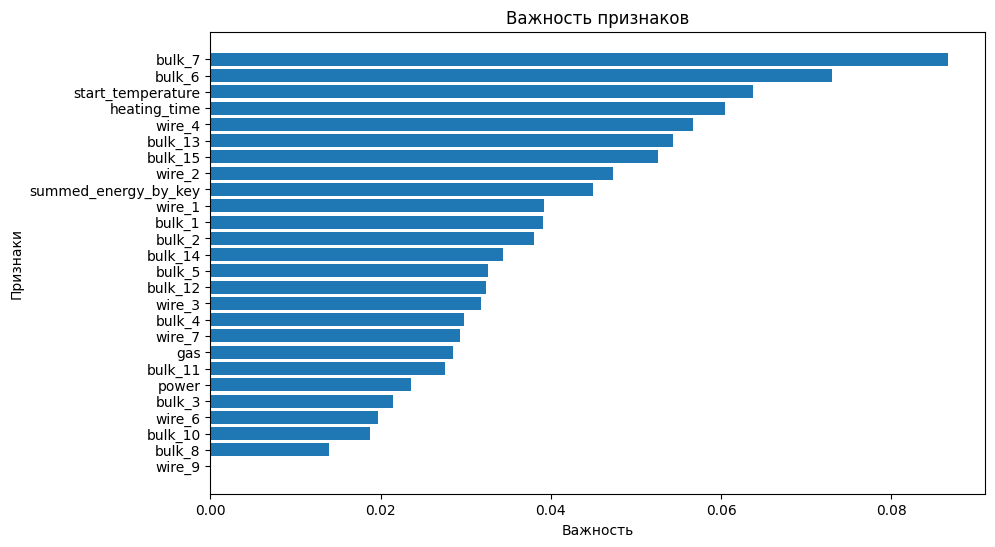

In [177]:
feature_importance = xgbr_model.best_estimator_.feature_importances_[np.argsort(xgbr_model.best_estimator_.feature_importances_)[::1]]
feature_names = features.columns[np.argsort(xgbr_model.best_estimator_.feature_importances_)[::1]]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.title('Важность признаков')
plt.show()

Удивительно, но признак `Bulk 7` оказалась более важным признаком по сравнению с остальными. 
Второе место претендует признак `Bulk 6`. 
Третье место - `Bulk 15`. 

Подведем итог ТОП 5:
1. `Bulk 7`
2. `Bulk 6`
3. `Bulk 15`
4. `start temperature` - `Начальная температура`
5. `heating time` - `Время нагрева`

Нет признаков, которые не входят в списках важности

## Проверка модель на адекватность

In [178]:
# Инициализируем модель
model = DummyRegressor(strategy="median")

In [179]:
# Обучим модель первой стадии на обучающей выборки
model.fit(features_train, target_train)

DummyRegressor(strategy='median')

In [180]:
# Получим предсказания на тестовой выборки
predictions = model.predict(features_test)

# Получаем значение MAE rougher
result_MAE = mean_absolute_error(target_test, predictions)

In [181]:
print('Предсказания констатной модели:', predictions.mean())
print('MAE констатной модели:', result_MAE)

Предсказания констатной модели: 1593.0
MAE констатной модели: 8.104991


MAE константной модели получилось вполне удовлетворительной оценкой - `8.104991`, т.е. получилось больше заявленной необходимости - `6,8`. 

Разница между константной модели и тестовой модели составляет `1.694119`

# Итог

## Сравнение решения и плана

По изначальному плану нам было задано оптимизировать производственные расходы, потому что металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали.

И мы решили построить модель, которая предскажет температуру стали. Следовательно, нам необходимо создать таблицу, в которой содержатся данные начальные и конечные температуры плавления стали в каждой партии. Это было создано, чтобы передать целевой признак - `конечная температура плавления стали` для обучения модели.

Потому что предсказание конечной температуры плавления стали позволит оптимизировать процесс и достичь нужной температуры с минимальным потреблением энергии. И зная конечную температуру плавления, металлургический комбинат сможет контролировать и регулировать процесс нагрева стали, чтобы достичь оптимального химического состава и желаемой температуры плавления. Это поможет снизить издержки на энергию, улучшить качество продукции и повысить эффективность производства.

Мы строго придерживались по планам, по которым необходимо сделать следующее:

##### 1. Исследовательская работа
Провели исследовательскую работу, в которой мы ознакомились с данными, графическими анализами и наличиями аномальными значениями. Также выставили планы по работу по данному проекту.

- Обнаружили **супер аномальное значение** в датафрейме `Данные о электродах` - колонки `Реактивная мощность` -  `-715.479919`

- Обнаружили **огромные пропущенные значения** в датафрейме `Данные о подаче сыпучих материалов (объём)`, но нельзя не отметить, что есть корреляция сильно положительная - `Bulk 1` и `Bulk 13`, `Bulk 7` и `Bulk 14`, и еще другие, значения у которых составляют `0.7`, `0.84` и т.д. И существуют корреляция сильно отрицательная. 

- Обнаружили **неестественное явление** - температура плавления стали. Т.е. средняя температура выплавки стали, которого мы можем чаще всего встречать - `1591` градусов по цельсии. А самой максимальной температурой составляет `1705` градусов по цельсии. Минимальной - `1191` градусов по цельсии. Очень странно будет, если их оставлять, потому что, по идее, температура плавления стали должно быть не менее `1500` градусов по цельсии, пусть минимальным порогом окажется `1400` градусов по цельсии. 

- Обнаружили **огромные пропущенные значения** в датафрейме `Данные о проволочных материалах (объём)`, но также присутствуют наличия сильноположительной корреляции - `Wire 1` и `Wire 3` - `0,72` и сильноотрицательной - `Wire 4` и `Wire 7`- `-0,4`.

##### 2. Предобработка данных

Совершали предобработку данных, а именно удалили супер-выброс, пропуски, заполняли пропуски нулями, объединили в общий датафрейм для исследовании взаимной корреляции признаков, в которой обнаружили сильно положительную корреляцию и положительную корреляцию.

- Несмотря на то, что это задание **не является строго обязательным (будет простым решением не преобразовать в другой тип данных)** - преобразование в другой тип в целях облегчения данных, но это усложняет написание кода - поддержание и сопровождение кода. Мы преобразовали в другой тип данных, чтобы сэкономить объем памяти датасета.

- Проверили на наличие дублирующих значений. Результат показал, что их нет.

- Ранее мы выяснили, что существует супер-выброс - в датафрейме `Данные о электродах` - колонки `Реактивная мощность` -  `-715.479919`, и устранили его.

- Также устранили **неестественное явление** - температура плавления стали, т.е. устранили значения меньше `1500` градусов по цельсии. Но не только удалили значения температуры, но и по номеру партии `key` по этому датафрейму. Потому что при объединении он учитывает номер партии `key` и отсеивает эти **неестественное явление**.

- И устранили пропуски температуры в датафрейме `Результаты измерения температуры`. Количество пропусков составляет порядка: `738`. А количество партий, в которой не заполнены температуры: `3422`. Нельзя не отрицать, что их довольно достаточно, если учитывать, что размер датафрейме `Результаты измерения температуры` составляет: `18092` - **почти меньше четверти**

- Ознакомили с процентами потери данных после предобработки данных. Их очень мало, больше всего пострадали - датафрейм `Результаты измерения температуры` - `23.143%`

- Также заполнили пропуски нулями по несколькими датафреймами. Нам известно, что датафреймы `Данные о подаче сыпучих материалов (объём)` и `Данные о проволочных материалах (объём)` имели огромные пропуски, что и их заполнили много.

- Создали новую таблицу `Результаты измерения температуры`, в которой содержатся начальые и конечные температуры плавления стали и время. Была создана, чтобы установить целевой признак - `конечная температура плавления стали` для машинного обучения. 

- Агрегировали датафрейм `Данные о электродах`, чтобы дополнить несколько признаков для улучшения качеств машинного обучения и снижать сильно положительную корреляцию. После агрегировании получили четыре признаков: `key`, `Полная мощность`, `Время нагрева` и `Суммированная энергия по партии`. Приведенные формулы `Полная мощность`, `Время нагрева` и `Суммированная энергия по партии` прилагаю ниже - _пункт 5.2._

- Полученные данные после агрегирования и создания новой таблицы объединили 5 датафрейма: `Результаты измерения температуры`, `Агрегирование данных об электродах`, `Данные о подаче сыпучих материалов (объём)`, `Данные о проволочных материалах (объём)` и `Данные о продувке сплава газом`

##### Тепловая карта корреляции объединенных датафреймов

После объединении на тепловой карте корреляции обнаружили пропуски в колонке `Wire 5` и скоррелированные признаки `Bulk 9` и `Wire 8`, у которых сильно положительная корреляция (по установленному пределу мы должны устранить колонку, в которой превышает допустимый предел скоррелированные признаки - `0.9`).

И для улучшения качеств обучения было удалено колонки: `Wire 5`, номер партии `key`, `Bulk 9` и `Wire 8`

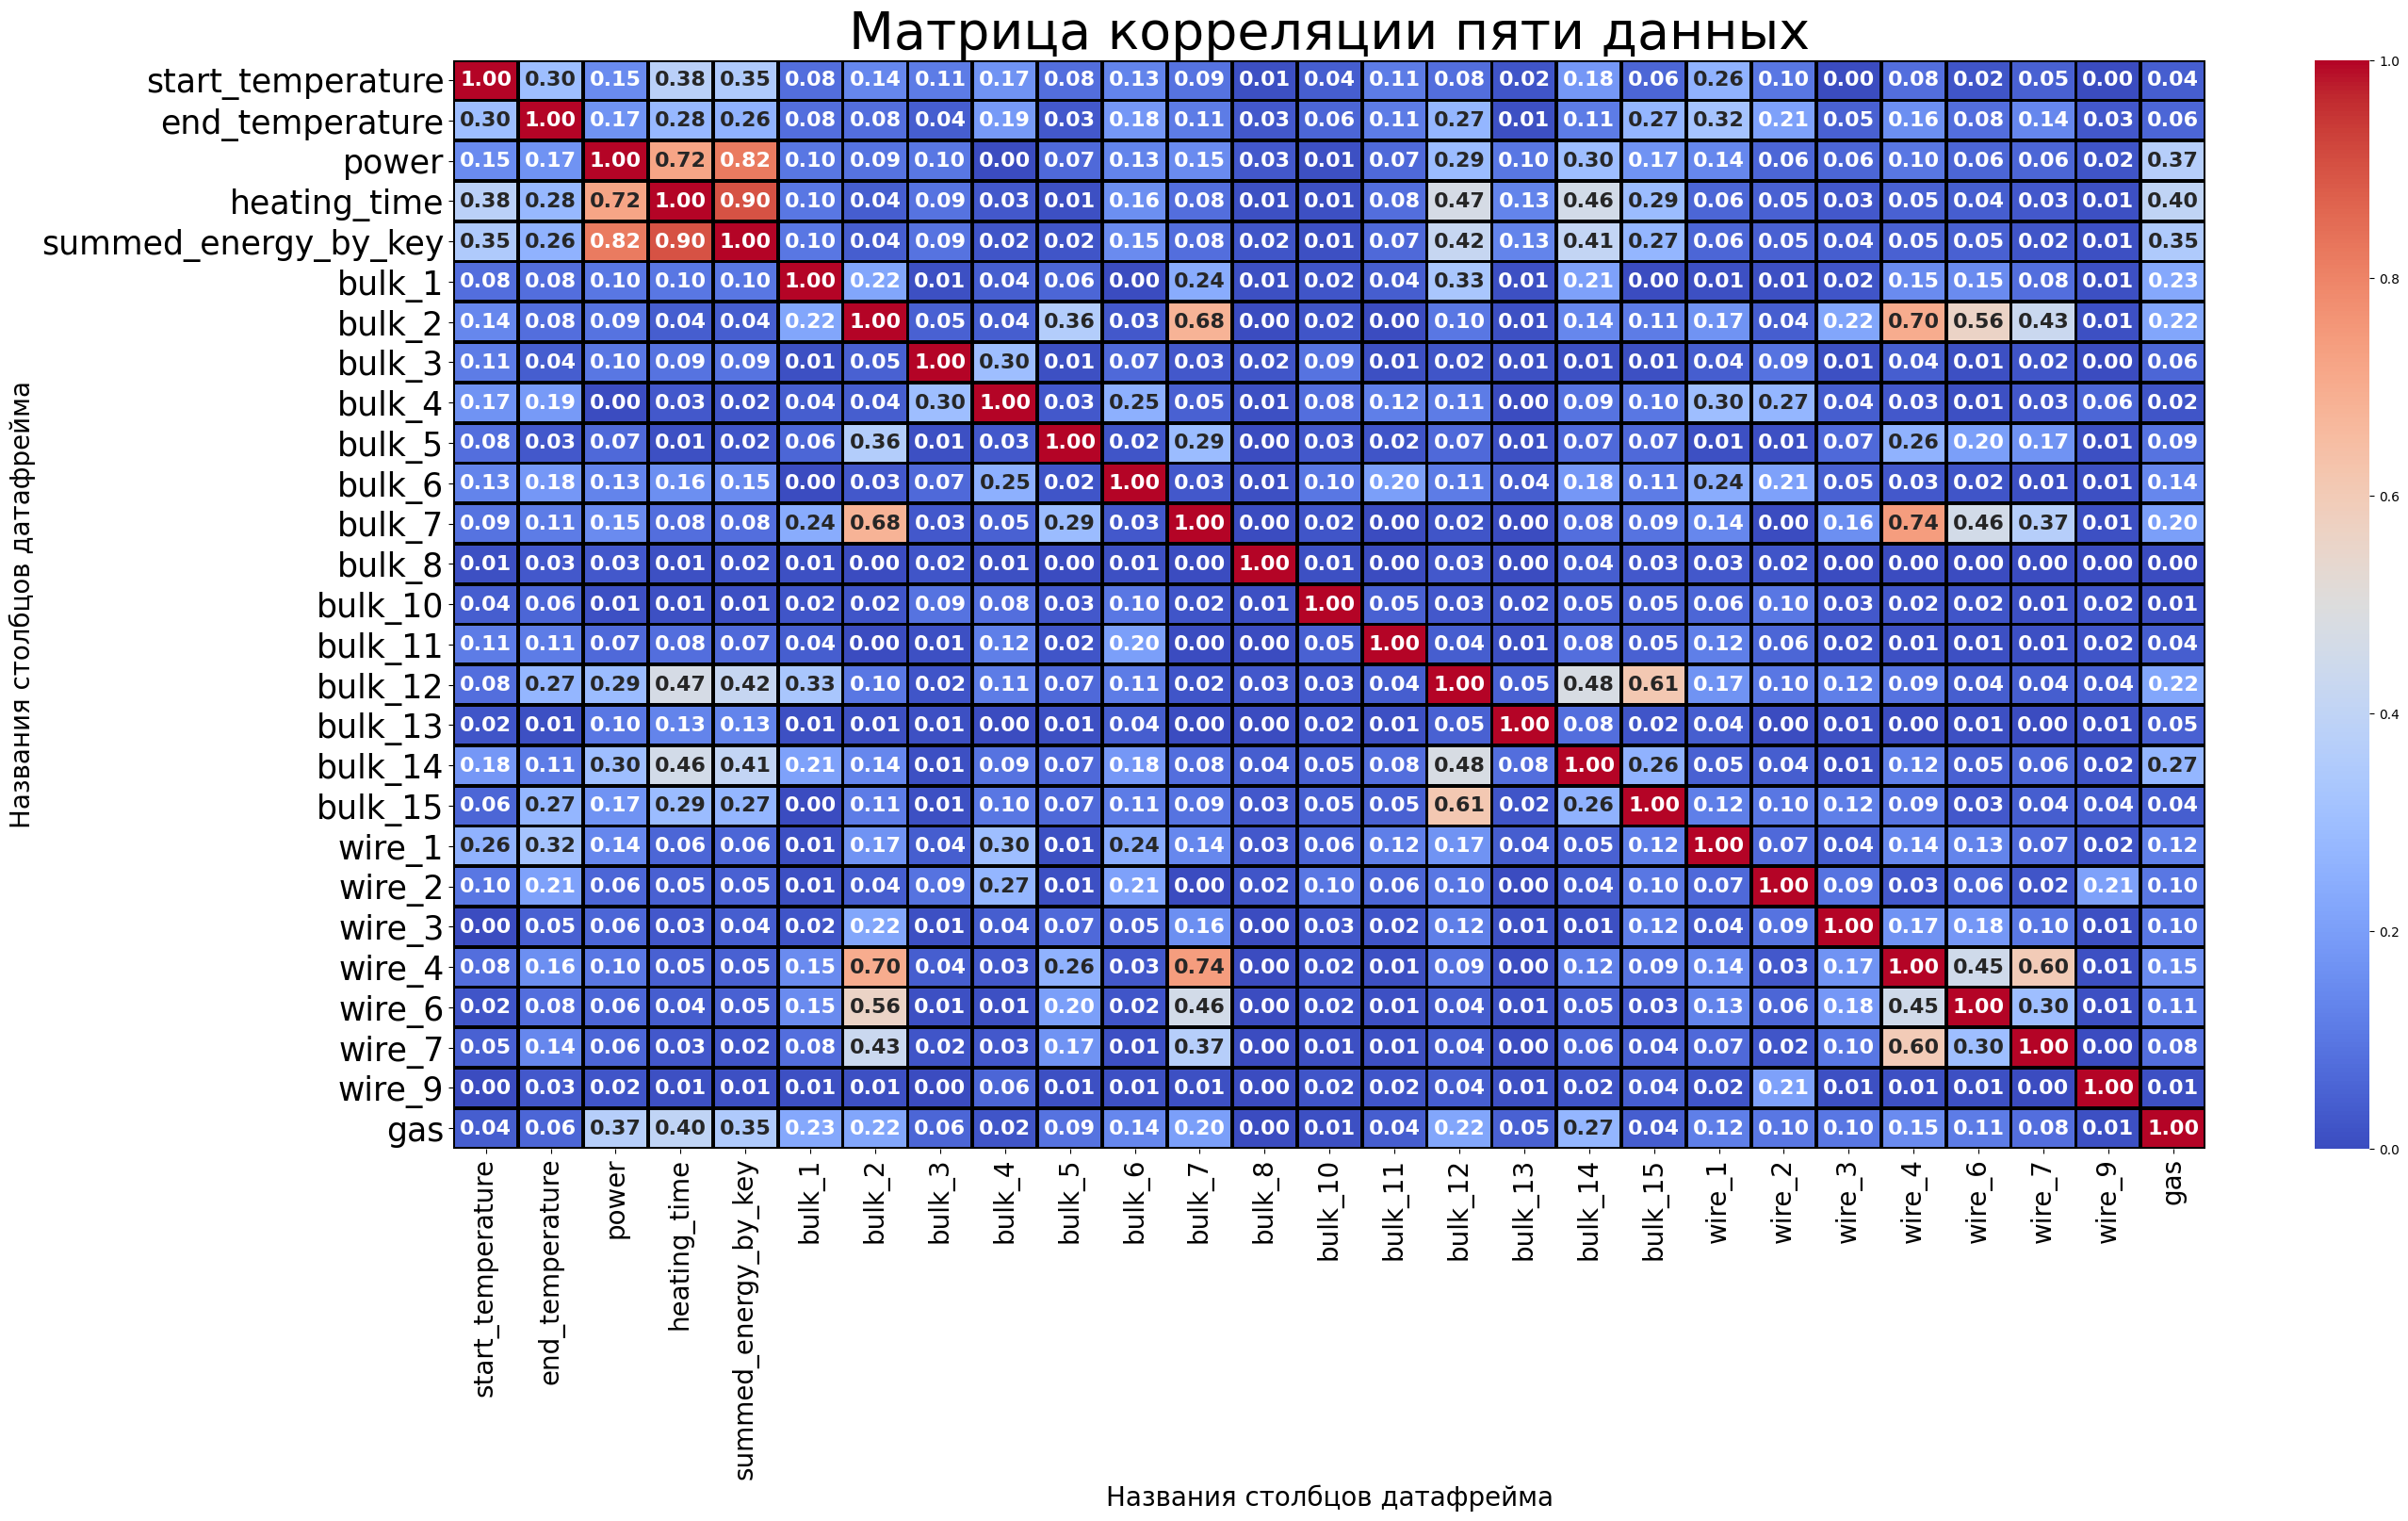

In [182]:
plt.figure(figsize=(30, 15))

# Вычисление матрицы корреляции и округление до двух знаков после запятой, а также устраняем минусы - используем модуль
corr_matrix = np.abs(big_data.corr().round(2))

# Построение тепловой карты корреляции
heatmap = sb.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    annot_kws={"size": 16, "weight": "bold"}, 
    linewidths=2,
    linecolor='black');

# Применение настроек шрифта
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)

heatmap.set_ylabel('Названия столбцов датафрейма', fontdict={'size': 20})
heatmap.set_xlabel('Названия столбцов датафрейма', fontdict={'size': 20})

# Добавление заголовка
plt.title('Матрица корреляции пяти данных', fontdict={'size': 40});

plt.show()

- Провели корреляцию объединенных датафреймов, и выяснились следующее:

Существуют положительная корреляция:
- `Bulk 2` и `Wire 4`
- `Bulk 2` и `Wire 6`
- `Bulk 2` и `Wire 7`

- `Bulk 7` и `Wire 4`
- `Bulk 7` и `Wire 6`
- `Bulk 7` и `Wire 7`

И при увеличении времени нагрева [c] увеличается суммарная энергии по партии
- `Heating time` и `Summed energy by key`

Существуют сильно положительная корреляция:
- `Bulk 9` и `Wire 8`
Но мы устранили это еще раньше

В большинствах случаях корреляция очень слабо отрицательная либо очень близки к нулю

- Убрали сильно положительную корреляцию `Bulk 9` и `Wire 8`, потому что их нельзя оставить, т.к. это сказывается на обучение линейным методом. Потому что, если есть мультиколлинеарности, то переменные модели становятся сильно зависимыми друг от друга, что это может делать оценку влияния каждой переменной на целевую переменную менее надежной. Что и может привести к нестабильности модели и переобучению. Не говоря уж о сложности интерпретации и низкой устойчивости модели.

- Положительная корреляция у нас есть несколько, и они говорят о том, что они движутся в одном направлении: при увеличении значения одной переменной, значение другой переменной также увеличивается. Т.е. что получается в итоге, при увеличении объема сыпучих материалов потребовались увеличению объемов проволочных материалов.

- Отрицательная корреляция (в нашем случае, когда значение равно или близки к нулю (темный цвет синий)) у нас их довольно много, и они говорят о том, что при увеличении объема сыпучих материалов потребовались уменьшению объемов проволочных материалов, иным словами можно сказать, что объем спыучих материалов независимо зависит от объема проволочных материалов.

##### 3. Настройка модели
Для метрических и линейных моделей сильно положительная корреляция плохо сказывается на обучение, и что решили удалить сильно положительную корреляцию.

И мы масштабировали признаки для линейных моделей, потому что они и нейронные сети требуют стандартизации, т.к. известно, что методы обучения этих моделей (градиетный спуск) плохо обучаются, если "ланшафт" оптимизируемой поверхности сильно вытянут. И гораздо быстрее сходятся если признаки одного масштаба.

Для деревьев стандартизация точно не важна, поскольку разбиения всегда идут по одному конкретному признаку и масштаб соседних признаков никак на это не влияет.
Однако на самом деле на простой линейной регрессии стандартизация также не окажет никакого влияния, поскольку все изменения переменной можно нивелировать за счет изменения коэффициента:

$y = \alpha + \beta X$ - без стандартизации

$y = \alpha_{st} + \beta_{st} \frac{X-mean}{std} = (\alpha_{st} - \frac{\beta_{st}mean}{std}) + (\frac{\beta_{st}}{std}) X$ - со стандартизацией

При этом $\alpha = (\alpha_{st} - \frac{\beta_{st}mean}{std})$ и $\beta = (\frac{\beta_{st}}{std})$.

##### 4. Семейства модели

Мы расширили несколько семейств моделей, чтобы нам достались большие возможности с подбором лучших моделей и протестировать с ними.

Список семейств моделей:

1. **Линейные методы**
- `LinearRegression`
- `Ridge Regressor`
- `ElasticNet`
- `Bayesian`
- `RidgeCV`
2. **Методы деревьев**
- `DecisionTreeRegressor`
- `RandomForestRegressor`
- `ExtraTreesRegressor`
3. **Градиетные бустинги**
- `AdaBoostRegressor`
- `LightGBMRegressor`
- `CatBoostRegressor`
- `GradientBoostingRegressor`
- `XGBRegressor`
4. **Другие методы**
- `KNeighborsRegressor`
- `MLPRegressor`
- `GaussianProcessRegressor`

Мы рассмотрели разные варианты модели в общей сложности `16` моделей.

###### 5. Анализ важности признаков модели-победителя

После тестирования лучшей модели провели анализ важности признаков, чтобы построить метрику, которая позволяет оценить вклад каждого признака в предсказательную способность модели. Более высокие значения означают, что признак вносит больший вклад в предсказания модели, а более низкие значения указывают на меньший вклад.

Однако важность признаков не является абсолютной мерой и может быть относительной для конкретной модели. Важность признаков может изменяться в зависимости от выбранной модели и ее настройки. Это означает, что не существует единого правильного способа определения важности признаков, и каждая модель может давать свои результаты.

При построении бизнеса на основе важного признака важно учитывать не только результаты одной модели, но и проводить анализ и сравнить результатов различных моделей. Различные модели могут давать разные важности признаков, и важно принимать во внимание эту вариативность. 

Также важно учитывать предметную область и экспертные знания, чтобы понять, какие признаки действительно имеют бизнес-значимость.

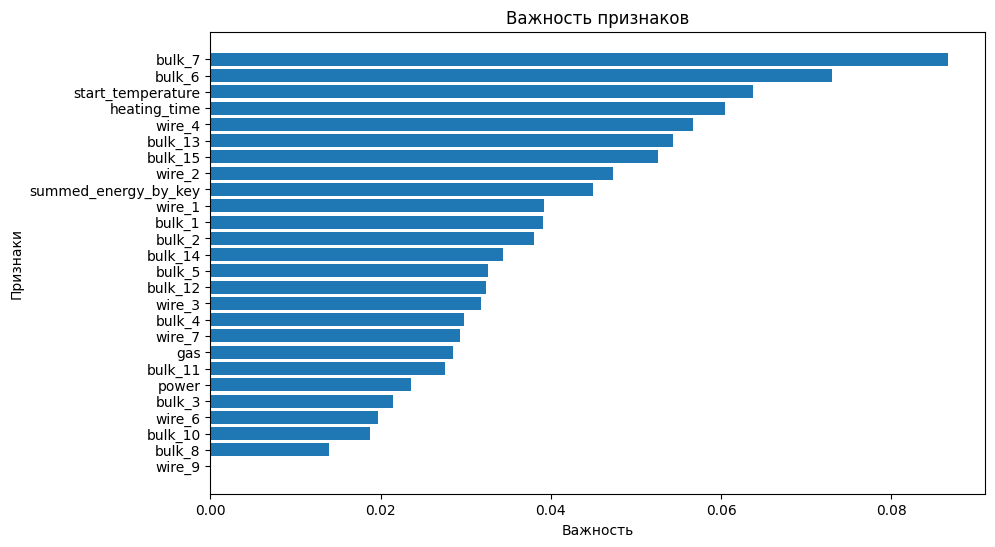

In [183]:
feature_importance = xgbr_model.best_estimator_.feature_importances_[np.argsort(xgbr_model.best_estimator_.feature_importances_)[::1]]
feature_names = features.columns[np.argsort(xgbr_model.best_estimator_.feature_importances_)[::1]]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.title('Важность признаков')
plt.show()

Подведем ТОП 5 значимых признаков:
1. `Bulk 7`
2. `Bulk 6`
3. `Bulk 15`
4. `start temperature` - `Начальная температура`
5. `heating time` - `Время нагрева`

Подведем ТОП 5 незначимых признаков:
1. `Bulk 8`
2. `Wire 9`
3. `Bulk 3`
4. `Bulk 10`
5. `Wire 6`

И отсутствуют признаки, которые не входят в списках важности

##### 6. Проверка модель на адекватность

После тестировании провели константную модель, потому что проверка на константную модель является важным этапом в процессе разработки и оценки модели. Зачастую это делается в качестве базового сравнения для оценки производительности и эффективности предлагаемой модели. 

И проверка на константную модель позволяет определить, насколько предлагаемая модель действительно способна предсказывать и обобщать данные. Константная модель представляет собой простейший прогноз, который не учитывает никаких входных данных и всегда выдает одно и то же значение. 

Сравнение предсказаний предлагаемой модели с предсказаниями константной модели позволяет оценить, насколько модель действительно улучшает предсказания по сравнению с простейшим подходом. Если модель не превосходит константную модель, это может указывать на проблемы в ее проектировании или недостаточную информацию для предсказания.

MAE константной модели получилось вполне удовлетворительной оценкой - `8.104991`, т.е. получилось больше заявленной необходимости - `6,8`. 

Разница между константной модели и тестовой модели составляет: `8.104991` - `6.410872` = `1.694119`

Что и говорит о успешном построении и моделировании машинного обучения.

## Используемые признаки для обучения и их обработка

Мы использовали признаков для обучения:
- `key` - `Номер партии`,

- `start_temperature` - `Начальная температура плавления стали`, 

- `power` - `Полная мощность`, 

Полная мощность - суммарная величина, которая включает в себе как активную, так и реактивную составляющие мощность

Мы получили по формуле:

$$ S = \sqrt{P^2 + Q^2} $$

- `heating_time` `Время нагрева дугой`, 

Время нагрева дугой получили по вычетам конечной времени нагрева дугой и начальной времени нагрева дугой

- `energy` `Энергия (Выделенная энергия для нагрева)`, 

Энергию получили за счет умножения время на полную мощность:

$$ Energy = t * S $$

- `summed_energy_by_key` - `Суммированная выделенной энергии по каждой партии`, 

$$ \sum_{n=1}^{\ m} Energy_n $$

где: 
$$ n - номер\ партии $$
$$ m - количество\ номера\ партии $$

- `Объем ковша для насыпки руды`:

`bulk_1`, `bulk_2`, `bulk_3`, `bulk_4`, `bulk_5`, `bulk_6`, `bulk_7`, `bulk_8`, `bulk_9`, `bulk_10`, `bulk_11`, `bulk_12`, `bulk_13`, `bulk_14`, `bulk_15`;

- `Объем проволочного материала`:

`wire_1`, `wire_2`, `wire_3`, `wire_4`, `wire_6`, `wire_7`, `wire_8`, `wire_9`;

- `gas` - `Инертный газ для нагрева`;

А целевой признак:
- `end_temperature` - `Конечная температура плавления стали`

## Трудности проекта

Трудности проекта заключается в этапах предобработки данных, потому что присутствуют огромные пропуски, особенно в датасетах температуры. Также в ходе предобработки выяснили неточные данные, а именно аномальные значения и нелогичные данные (тепмпература плавления стали около `1200` градусов по цельсии, а в ковше плавления от `1500` градусов по цельсии). 

Также непросто поддерживать код и отлаживать его, потому что после деления модель на обучающую и тестовую выборку, в которых не сохраняют типы переменной, которая я ранее преобразовал данные в целях облегчения и уменьшения занимаемой памяти. То есть, после преобразования я получаю датасет с типами данных: `int32`, `float32`, `datatime[ns]`. А после деления получаем: `int64`, `float64`, `datatime[ns]`. Приходится прибегнуть к дополнительному написанию кода для поддержания. 

Также я не являюсь специалистом по области материаловедения и технологического процесса обработка стали. Пришлось прибегнуть к справочному материалу, чтобы выявлять предельную температуру плавления стали и ознакомиться с диаграммой плавления стали. 

## Полное описание модели

Мы применяли несколько моделей на обучение, но одним из них оказалась лучшей - модель `XGBRegressor`, значение метрики MAE которой составляет `6.410872`, время на обучение `0.18491` (намного меньше 1 секунда), и гиперпараметры: 

 - `'colsample_bytree': 0.8`,
 - `'gamma': 0.2`,
 - `'learning_rate': 0.1`,
 - `'max_depth': 5`,
 - `'n_estimators': 100`,
 - `'subsample': 0.8`

И также установили параметр:
`random_state: 50623`

Разделили модель на обучающую и тестовую выборку в пропорциях: `75%` и `25%`

Прилагаю ниже список используемые модели. В таблице мы можем ознакомиться с метрикой `MAE`, время обучения и лучшие гиперпараметры. 

In [184]:
results

,Название модели,MAE обучающей выборки,Время обучения в обучающей выборки [s],Лучшие гиперпараметры,Рейтинг [%]
0,LinearRegression,6.547013,0.001503,{},16.077849
1,Ridge Regression,6.291203,0.001415,"{'alpha': 10.0, 'solver': 'sparse_cg'}",16.731603
2,ElasticNet,6.269342,0.00235,"{'alpha': 0.1, 'l1_ratio': 0.25, 'max_iter': 1...",16.789814
3,Bayesian Ridge Regression,6.365591,0.002501,"{'alpha_1': 1e-06, 'alpha_2': 0.0001, 'fit_int...",16.535931
4,RidgeCV,6.365591,0.002501,"{'alpha_1': 1e-06, 'alpha_2': 0.0001, 'fit_int...",16.535931
5,DecisionTreeRegressor,7.599571,0.004314,"{'max_depth': 11, 'min_samples_leaf': 0.1}",13.850784
6,RandomForestRegressor,6.407571,1.202045,"{'bootstrap': True, 'max_depth': 30, 'max_feat...",16.267317
7,ExtraTreesRegressor,6.435194,0.36459,"{'max_depth': None, 'max_features': 'sqrt', 'm...",16.308788
8,AdaBoostRegressor,7.00579,0.192615,"{'learning_rate': 0.1, 'loss': 'exponential', ...",15.003455
9,LightGBMRegressor,6.171848,0.020113,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",17.052447


## Итоговая метрика

После выбора лучшей модели и теста получили итоговую метрику, которая оказалась вполне приемлемым для эксплуатации

In [185]:
result_best

,Название модели,MAE тестовой выборки,Предсказания температуры,Время обучения в тестовой выборки [s]
0,XGBRegressor,6.415044,1593.665283,0.011


Результат получилось очень неплохим - MAE `6.410872`. Среднее значение предсказанной температуры составляет `1594` градусов по цельсии. А время на обучение составляет намного меньше 1 секунда. Это вполне оптимальное значение для внедрения и эксплуатации. 

## Рекомендация по улучшению

У меня есть несколько рекомендаций по улучшению качества модели машинного обучения для предсказания конечной температуры плавления стали:

- Рабочие с предприятии не должны оставлять пропуски. Поскольку проект столкнулся с проблемой большого количества пропущенных значений и неточных данных, необходимо уделить особое внимание этапу предобработки данных. 

- Рассмотреть другие возможности создания новых признаков, которые могут содержать дополнительную информацию о процессе обработки стали. Например, мы можем добавить ещё признаки, которые связаны с временными интервалами, статистическими показателями или химическим составом материала. Это может помочь модели получить **намного больше информации и улучшить прогнозы**.

- Привлечь специалиста в области материаловедения и технологического процесса обработки стали, чтобы получить обратную связь и советы. А также для построения сложных формул плавки стали с многими учетами: пассивное охлаждение ковша (наружный воздух в цехе охлаждает ковш), марки стали, теплоемкость стали, и т.д.

- Приборные устройства должны быть устойчивыми и бесперебойно работали, чтобы получили точные данных без лишних шумов